In [472]:
import pandas as pd
import numpy as np
import ast
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing, cluster)
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import pickle
from scipy import stats
import sys
from numpy import unique
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.mixture import BayesianGaussianMixture

sys.path.insert(0, '../Service/')

from DataPreprocessingService import *
seed = 42
np.random.seed(seed)

In [473]:
dataframe = pd.read_csv("../Data/data_v2.csv")

In [474]:
columns = ['CodeLines', 'CommentLines', 'MethodNumber',
       'ClassNumber', 'InterfaceNumber','InheritanceDeclarations', 
       'UsingsNumber','HttpClientCalls', 'CSFiles','TermFrequency','CodeSimilarity_Median',
       'ClassCouplingListing_Median', 'CodeLinesPerFile_Median','CommentLinesPerFile_Median', 'TermFrequency','EndOfLifeFramework']

In [475]:

class KmeansTest:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

In [476]:
def predict_test(data, centroids):
    centroids, data = np.array(centroids), np.array(data)
    distances = []
    for unit in data:
        for center in centroids:
            distances.append(np.sum((unit - center) ** 2))                
    # distances = np.reshape(distances, data.shape)
    closest_centroid = [np.argmin(dist) for dist in distances]
    print(closest_centroid)

In [527]:
from MLService import *
from sklearn.decomposition import NMF
d = []
for i in range (1, 10):
    
    data = pd.DataFrame(dataframe.loc[[i]])
    data = transform_data(data)
    # # print(data)
    # # for column in columns:
    # #     data[column] = stats.yeojohnson(data[column])[0]
    # # data = yeojohnson(columns, data)
    # # # print(data)
    # # formatted_data = ["{:.2f}".format(x) for x in data]
    knn_df = knn_smoothing(data, 1)
    # print(knn_df)
    # X_s = preprocessing.StandardScaler().fit_transform(knn_df)
    # print(knn_df)
    # print(newpca[i,:].shape)
    # p = newpca[i,:].reshape(-1, 1)
    # print(X_s)
    d.extend(knn_df)
    # print(d)
    # X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(d)]
    # print(X_reconstructed_kmeans)

da = pcas.transform(d)
print(kmeans.predict(da))


[4 4 4 4 4 4 4 4 4]


In [478]:
# for i in range (1, 50):
#     data = pd.DataFrame(dataframe.loc[[i]])
#     X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_s)
#     X_embedded_tensor = torch.DoubleTensor(X_embedded)

#     data = transform_data(data)
#     kmeans_result = kmeans(X_embedded_tensor, 7)
#     kmeans_labels = kmeans_result[1].numpy()
#     print(kmeans.predict(X_embedded))


In [479]:
from sklearn.metrics import silhouette_score
silhouette_score_value = silhouette_score(newpca, means)
print(f"Silhouette Score: {silhouette_score_value}")


Silhouette Score: 0.37364352312531923


In [480]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Project_ID               600 non-null    object 
 1   Project_Name             600 non-null    object 
 2   EndOfLifeFramework       600 non-null    float64
 3   ForFrequency             600 non-null    float64
 4   IfFrequency              600 non-null    float64
 5   ForEachFrequency         600 non-null    float64
 6   WhileFrequency           600 non-null    float64
 7   CodeLines                600 non-null    float64
 8   CommentLines             600 non-null    float64
 9   MethodNumber             600 non-null    float64
 10  ClassNumber              600 non-null    float64
 11  InterfaceNumber          600 non-null    float64
 12  InheritanceDeclarations  600 non-null    float64
 13  ExternalAPICalls         600 non-null    object 
 14  HttpClientCalls          6

In [481]:
pd.set_option('display.float_format', lambda x: format(x, '.0f'))
dataframe.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,4,35,763,79,16,23111,3934,676,328,15,176,1899,883,256
std,8,170,2892,269,63,85410,14324,2017,829,37,504,45640,2405,603
min,0,0,0,0,0,11,0,0,1,0,0,-1,0,1
25%,0,0,16,1,0,1237,43,34,31,1,12,0,90,34
50%,1,0,67,7,1,3826,254,104,86,4,40,0,254,84
75%,5,6,260,34,5,12104,1542,352,236,11,119,2,699,214
max,66,2135,35665,2802,758,1498515,211030,26617,11528,380,7926,1117948,31518,8452


Removing duplicates that could be present from the ETL process

In [482]:
dataframe.drop_duplicates(subset=dataframe.loc[:, dataframe.columns != 'Project_ID'])

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,0,24,"[10, 0, 5, 0, 1, 0, 0, 1, 24, 1, 0, 3, 1, 0, 0...",22,326,"[4, 12, 1, 18, 46, 19, 12, 0, 16, 2, 2, 3, 3, ...","[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,3,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,247,"[5, 8, 14, 12, 12, 0, 1, 0, 3, 5, 2, 6, 5, 2, ...","[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,1,40,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,241,"[3, 12, 20, 20, 20, 13, 4, 11, 10, 7, 7, 10, 1...","[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,10,72,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,552,"[0, 5, 16, 3, 12, 14, 4, 15, 13, 33, 45, 0, 2,...","[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,4,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,111,"[10, 14, 10, 0, 2, 5, 10, 2, 9, 2, 10, 3, 9, 2...","[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,f5a6d797-4fcd-4963-a473-0eba5767f6c2,Yu-Core_SwashbucklerDiary,0,4,431,33,7,11249,404,518,...,12,127,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,357,"[4, 13, 4, 2, 18, 9, 56, 2, 3, 9, 4, 7, 3, 9, ...","[21, 102, 15, 15, 109, 44, 281, 20, 12, 29, 24...","[0, 5, 0, 2, 3, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.79, 1.95, 1.42, 0.97, 2.51, 1.31, 6.41, 3.7...",235
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,0,6,2,0,442,42,20,...,0,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,13,"[74, 8, 1, 1, 1, 7, 12]","[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9
597,3aad8b4e-c419-4d56-857e-f2ae0f077f65,zaranetCore_IdentityServer_SSO,7,0,3,0,0,460,16,17,...,2,7,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...",0,84,"[0, 0, 7, 0, 3, 8, 13, 10, 2, 4, 12, 0, 12, 2,...","[7, 10, 46, 11, 22, 49, 58, 41, 11, 20, 20, 7,...","[0, 0, 0, 0, 0, 1, 2, 5, 0, 0, 8, 0, 0, 0, 0, ...","[0.4, 4.3, 8.53, 8.96, 0.0, 3.57, 3.85, 4.22, ...",19
598,a769210a-960c-4211-ad47-739e7edfe7c7,Zimmergren_dotnet-core-aci-demo,3,0,2,2,3,156,37,8,...,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,11,"[8, 43, 3]","[45, 76, 35]","[0, 35, 2]","[0.0, 47.24, 63.21, 12.47, 54.87, 100.0, 7.75,...",3


# Data Exploration

In [483]:
dfcopy = dataframe.copy()

Getting the max global boundaries of the list columns

In [484]:
print("ClassCouplingListing " + repr(global_boundaries(dfcopy['ClassCouplingListing'])))
print("CodeSimilarity " + repr(global_boundaries(dfcopy['CodeSimilarity'])))
print("CodeLinesPerFile " + repr(global_boundaries(dfcopy['CodeLinesPerFile'])))
print("CommentLinesPerFile " + repr(global_boundaries(dfcopy['CommentLinesPerFile'])))

ClassCouplingListing (6857, 0)


CodeSimilarity (100, 0)
CodeLinesPerFile (203174, 0)
CommentLinesPerFile (47801, 0)


In [485]:
def get_boundaries(lower, higher, numberOfBins):
    boundaries = np.linspace(lower, higher, numberOfBins)
    boundaries[-1] = np.inf
    return boundaries

For CodeSimilarity, ClassCouplingListing, CodeLinesPerFile and CommentLinesPerFile, bins were made, the last bin contains all values between the previous and infinity such that all data is grouped 

In [486]:
def get_histogram_of_list_values(data):
    flat_values = [item for sublist in data for item in sublist]
    plt.hist(flat_values, edgecolor='black')

In [487]:
def boundaries_splitting(column, boundaries, column_name):
    for i in range(len(boundaries) - 1):
        bin_name = f'{column_name}_{boundaries[i]}_{boundaries[i + 1]}'
        dfcopy[bin_name] = column.apply(
            lambda x: sum(boundaries[i] <= value < boundaries[i + 1] for value in np.atleast_1d(x)))

In [488]:
type(dfcopy)

pandas.core.frame.DataFrame

In [489]:
columns = ['CodeSimilarity', 'ClassCouplingListing', 'CodeLinesPerFile', 'CommentLinesPerFile', 'ExternalAPICalls']
dfcopy = handle_list_to_median(columns, dfcopy)

C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  >>> np.mean(a, axis=0)


C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  >>> np.mean(a, axis=0)


In [490]:
dfcopy.head(10)

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,"[4, 12, 1, 18, 46, 19, 12, 0, 16, 2, 2, 3, 3, ...","[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103,11,8,82,1,0
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,"[5, 8, 14, 12, 12, 0, 1, 0, 3, 5, 2, 6, 5, 2, ...","[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64,6,6,22,0,0
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,"[3, 12, 20, 20, 20, 13, 4, 11, 10, 7, 7, 10, 1...","[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46,5,8,28,0,0
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,"[0, 5, 16, 3, 12, 14, 4, 15, 13, 33, 45, 0, 2,...","[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154,15,6,21,0,0
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,"[10, 14, 10, 0, 2, 5, 10, 2, 9, 2, 10, 3, 9, 2...","[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53,7,6,10,0,0
5,90f4b455-d48e-48d3-8129-0c3f9badcc67,afgalvan_Tilia,8,1,20,1,0,13534,44,248,...,"[7, 9, 4, 4, 13, 5, 1, 1, 13, 10, 10, 9, 4, 16...","[29, 5, 42, 27, 27, 87, 40, 13, 11, 93, 66, 66...","[3, 6, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, ...","[87.38, 3.1, 1.45, 0.06, 0.49, 0.16, 0.15, 4.1...",209,13,5,24,0,0
6,ddfd0398-1f01-4631-80b9-ecfc1443de48,AhmedMoosa_CleanArchitecture-ASPNETCore,3,0,8,0,0,573,19,15,...,"[12, 1, 0, 2, 14, 5, 5, 10, 10, 9, 6, 21, 10, 2]","[34, 18, 12, 12, 12, 12, 11, 12, 15, 20, 22, 2...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 1, ...","[9.12, 0.0, 12.68, 6.37, 8.05, 1.58, 1.04, 6.5...",20,5,8,21,0,0
7,0d8a0485-2fc7-4368-8c98-5066f8b7ad7f,ahmettugur_MinimalApiCleanArchitecture,0,0,37,6,1,4543,20,123,...,"[7, 0, 7, 0, 7, 11, 10, 17, 1, 0, 1, 0, 3, 7, ...","[37, 18, 52, 8, 69, 85, 26, 90, 7, 16, 6, 15, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7.1, 16.68, 0.5, 0.0, 0.71, 1.37, 0.43, 1.38,...",146,12,7,18,0,0
8,6379c58b-8ed4-4aa3-9da9-42e17b4c0bfa,aksharp_DDD.Light,21,0,54,0,2,3178,487,118,...,"[11, 16, 1, 14, 8, 3, 7, 23, 3, 8, 6, 25, 13, ...","[7, 10, 6, 46, 7, 69, 7, 13, 11, 7, 16, 9, 10,...","[0, 0, 0, 0, 7, 1, 7, 0, 0, 7, 0, 0, 0, 0, 0, ...","[8.66, 6.51, 9.24, 98.7, 4.14, 98.89, 12.05, 1...",139,14,4,15,0,0
9,8ecf893e-f59b-4062-9ead-3b244f689949,alesimoes_hexagonal-clean-architecture,9,0,38,1,0,2780,33,90,...,"[7, 1, 0, 3, 7, 15, 7, 4, 4, 4, 13, 6, 5, 8, 6...","[11, 9, 6, 6, 27, 12, 9, 11, 24, 52, 35, 21, 1...","[0, 10, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,...","[96.61, 91.7, 95.3, 91.82, 89.5, 78.42, 0.29, ...",116,9,3,20,0,0


For ExternalAPICalls json data for each row was extracted into simple lists

In [491]:
def extract_numbers_from_json(json_string):
    try:
        data = json.loads(json_string.replace("'", "\""))
        numbers = [value for value in data if isinstance(value, int)]
        return numbers
    
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return []

In [492]:
dfcopy['ExternalAPIExtracted'] = dfcopy['ExternalAPICalls'].apply(extract_numbers_from_json)
dfcopy

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median,ExternalAPIExtracted
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,"[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103,11,8,82,1,0,"[10, 0, 5, 0, 1, 0, 0, 1, 24, 1, 0, 3, 1, 0, 0..."
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,"[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64,6,6,22,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,"[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46,5,8,28,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,"[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154,15,6,21,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,"[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53,7,6,10,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,f5a6d797-4fcd-4963-a473-0eba5767f6c2,Yu-Core_SwashbucklerDiary,0,4,431,33,7,11249,404,518,...,"[21, 102, 15, 15, 109, 44, 281, 20, 12, 29, 24...","[0, 5, 0, 2, 3, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.79, 1.95, 1.42, 0.97, 2.51, 1.31, 6.41, 3.7...",235,12,6,27,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,0,6,2,0,442,42,20,...,"[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9,6,7,18,1,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
597,3aad8b4e-c419-4d56-857e-f2ae0f077f65,zaranetCore_IdentityServer_SSO,7,0,3,0,0,460,16,17,...,"[7, 10, 46, 11, 22, 49, 58, 41, 11, 20, 20, 7,...","[0, 0, 0, 0, 0, 1, 2, 5, 0, 0, 8, 0, 0, 0, 0, ...","[0.4, 4.3, 8.53, 8.96, 0.0, 3.57, 3.85, 4.22, ...",19,9,3,20,0,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ..."
598,a769210a-960c-4211-ad47-739e7edfe7c7,Zimmergren_dotnet-core-aci-demo,3,0,2,2,3,156,37,8,...,"[45, 76, 35]","[0, 35, 2]","[0.0, 47.24, 63.21, 12.47, 54.87, 100.0, 7.75,...",3,47,8,45,2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [493]:
def global_boundaries_for_list(data):
    global_max = 0
    global_min = 9999

    for row in data:
        if len(row) != 0:
            row_max = np.max(row)
            row_min = np.min(row)
            if row_max > global_max:
                global_max = row_max
            if row_min < global_min:
                global_min = row_min

    return global_max, global_min

In [494]:
val1, val2 = global_boundaries_for_list(dfcopy['ExternalAPIExtracted'])
print(f'{val1} {val2}')

7350 0


# Box plots after data binning

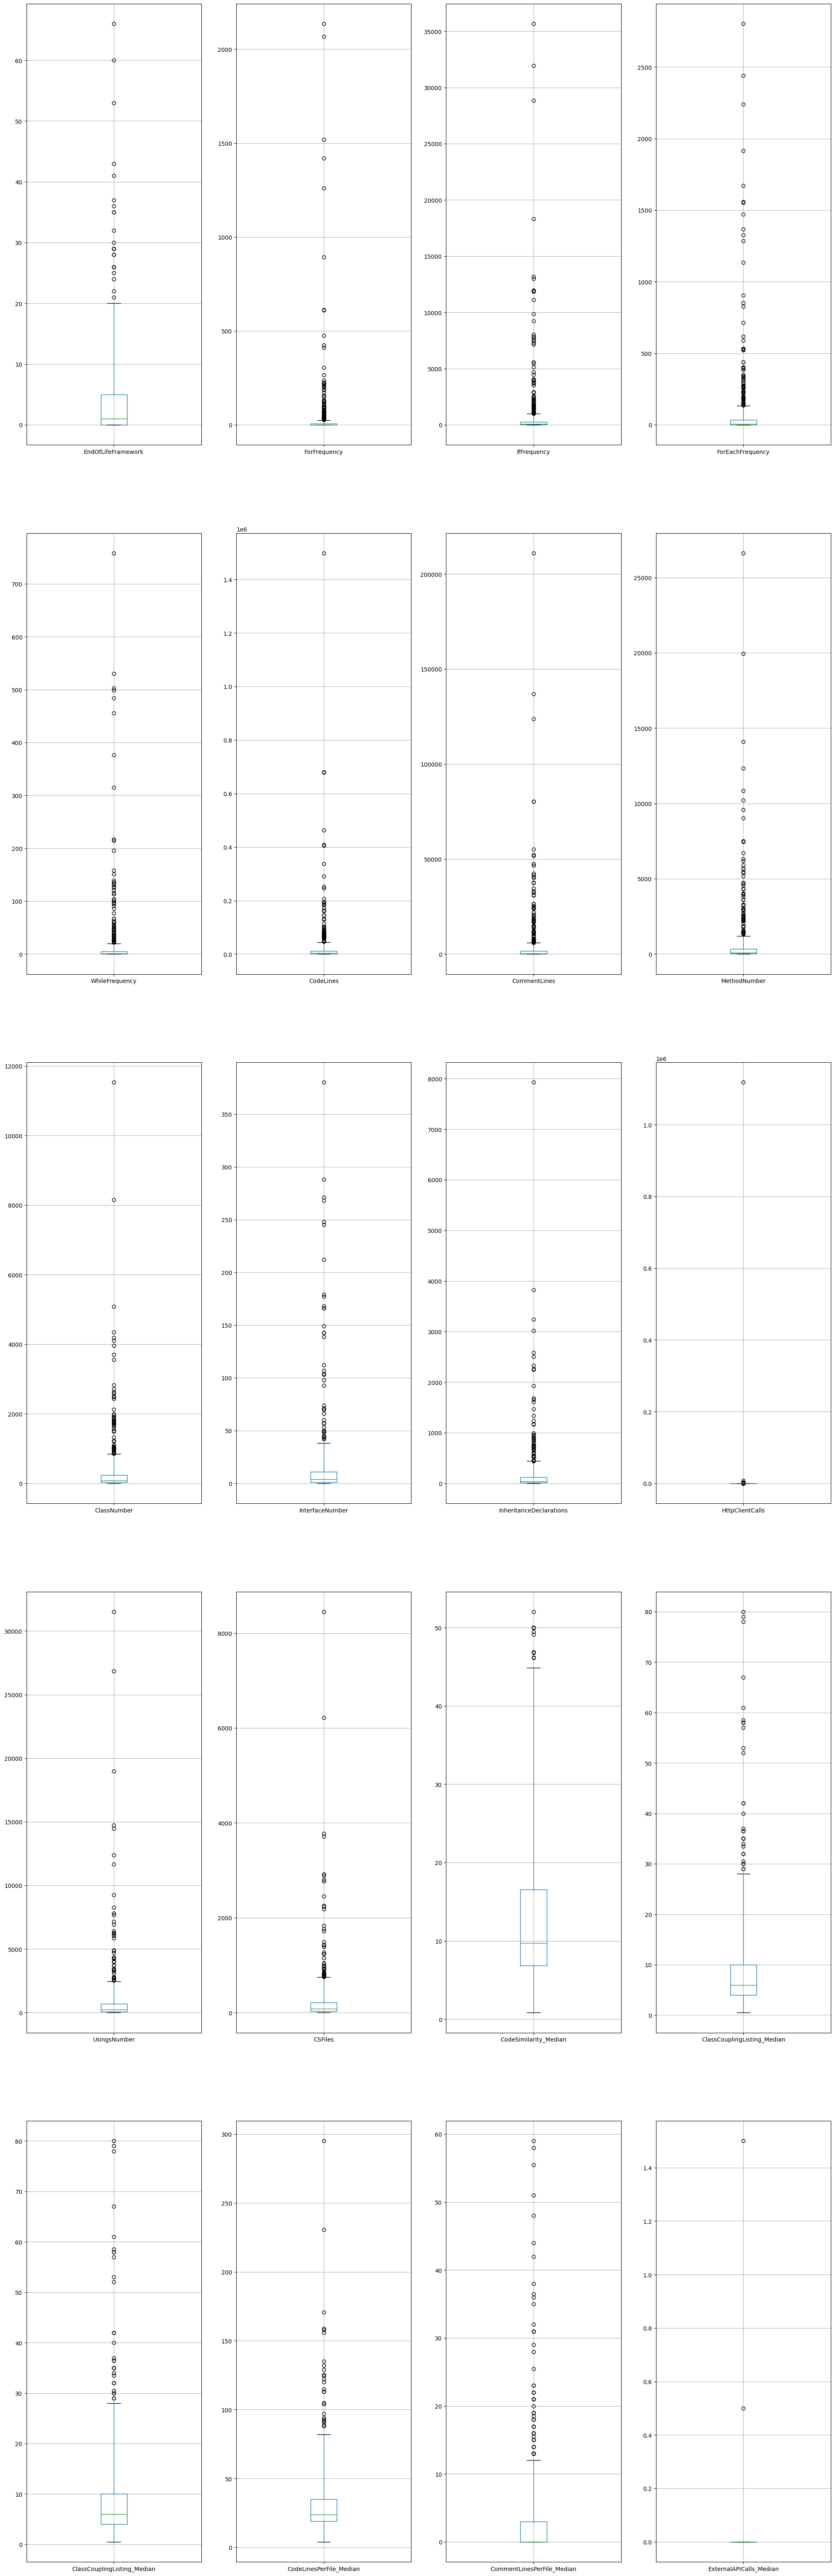

In [495]:
columns = dfcopy.select_dtypes(include=np.number).columns
col_nr = round(len(columns)/5)
fig, axes = plt.subplots(5, col_nr,  figsize=(25,80))
for i in range(col_nr):
    dfcopy.boxplot(column=columns[i], ax=axes[0][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+4], ax=axes[1][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+8], ax=axes[2][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+12], ax=axes[3][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+15], ax=axes[4][i], showfliers=True, whis=3)

Removing outliers based on percentiles

In [496]:
columns = dfcopy.select_dtypes(include=np.number).columns
dfcopy = remove_outliers(columns, dfcopy)


In [497]:
dfcopy.drop(columns=['Project_Name','Project_ID','ClassCouplingListing', 'CodeSimilarity', 'ExternalAPICalls', 'ExternalAPIExtracted','CodeLinesPerFile','CommentLinesPerFile'], axis=1,inplace=True)

Multiple imputation with knn imputation to remove 0s

Imputing twice to account for nan's and 0's

In [498]:
dfcopy

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median
0,0,18,1041,82,11,17643,2632,473,168,0,24,22,326,103,11,8,NaN,1,NaN
1,0,0,24,2,1,1713,36,48,56,3,29,0,247,64,6,6,22,0,0
2,0,0,7,1,0,1497,100,32,58,1,40,0,241,46,5,8,28,0,0
3,0,0,82,17,0,6313,361,109,144,10,72,2,552,154,15,6,21,0,0
4,0,1,15,3,0,1010,2,17,33,4,20,0,111,53,7,6,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,4,431,33,7,11249,404,518,214,12,127,4,357,235,12,6,27,0,0
596,2,0,6,2,0,442,42,20,7,0,0,0,13,9,6,7,18,1,0
597,7,0,3,0,0,460,16,17,17,2,7,0,84,19,9,3,20,0,0
598,3,0,2,2,3,156,37,8,5,0,1,0,11,3,NaN,8,45,2,0


In [499]:
imputed_nans = impute_nans(dfcopy)
imputed_nans.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,2,12,311,34,6,12381,1516,296,194,8,95,36,476,165,11,7,26,1,0
std,2,27,563,60,13,20019,2723,413,247,9,123,355,556,187,5,3,9,2,0
min,0,0,0,0,0,11,0,0,1,0,0,-1,0,1,1,0,4,0,0
25%,0,0,16,1,0,1237,43,34,31,1,12,0,90,34,7,4,19,0,0
50%,1,0,67,7,1,3826,251,104,86,4,40,0,250,84,10,6,24,0,0
75%,3,6,248,32,5,12012,1506,351,232,11,119,2,666,214,15,8,32,3,0
max,8,156,2932,275,62,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8,0


In [500]:
imputed_nans.drop('ExternalAPICalls_Median', inplace=True, axis=1)
dfcopy = impute_zero_values(imputed_nans)

In [501]:
dfcopy.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,3,15,311,35,7,12381,1516,296,194,9,95,61,479,165,11,7,26,3
std,2,27,563,60,12,20019,2723,413,247,9,123,362,556,187,5,3,9,2
min,0,1,1,1,1,11,1,1,1,1,1,-1,1,1,1,0,4,0
25%,1,2,16,2,2,1237,44,34,31,2,12,4,91,34,7,4,19,2
50%,3,2,67,8,2,3826,251,104,86,5,40,13,254,84,10,6,24,3
75%,4,12,248,33,6,12012,1506,351,232,12,119,27,669,214,15,8,32,4
max,8,156,2932,275,62,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8


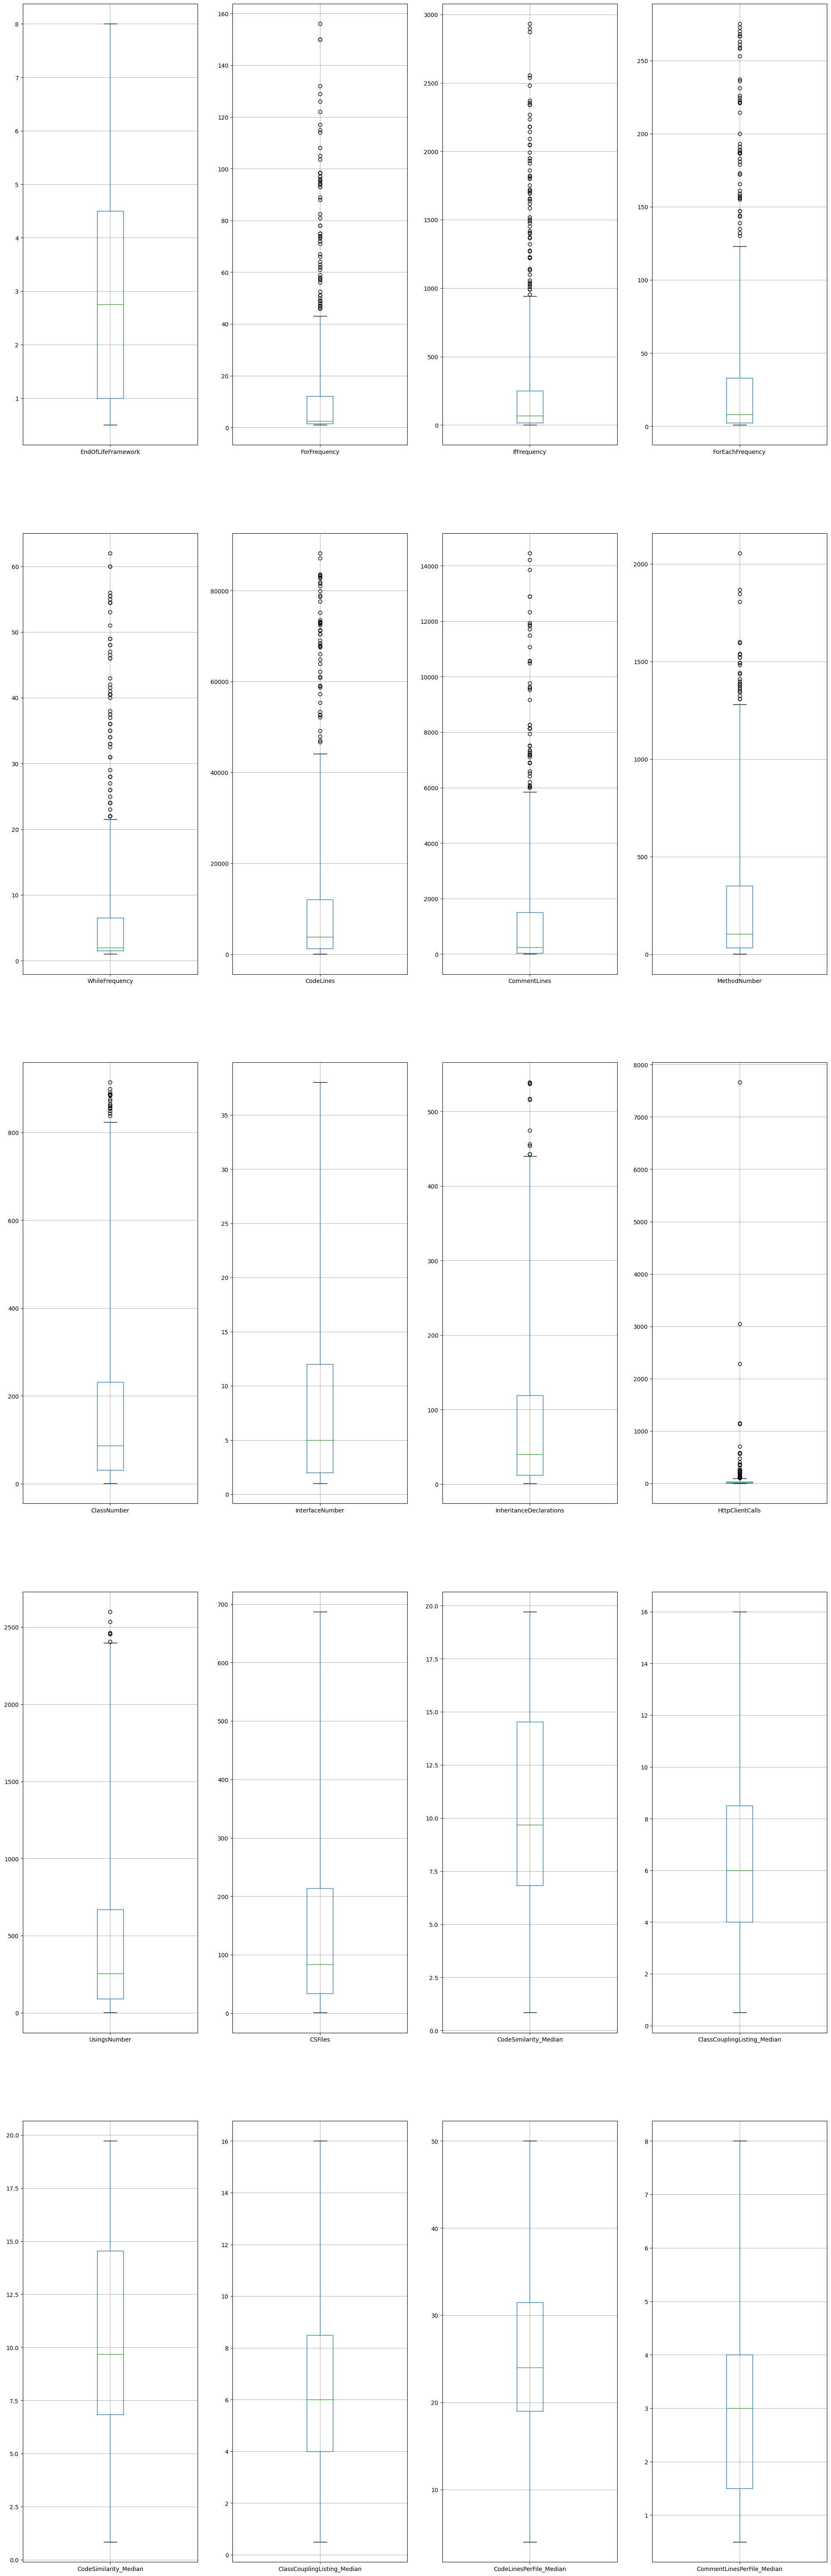

In [502]:
columns = dfcopy.select_dtypes(include=np.number).columns
col_nr = round(len(columns)/5)
fig, axes = plt.subplots(5, col_nr,  figsize=(25,80))
for i in range(col_nr):
    dfcopy.boxplot(column=columns[i], ax=axes[0][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+4], ax=axes[1][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+8], ax=axes[2][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+12], ax=axes[3][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+14], ax=axes[4][i], showfliers=True, whis=3)

In [503]:
dfcopy.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,3,15,311,35,7,12381,1516,296,194,9,95,61,479,165,11,7,26,3
std,2,27,563,60,12,20019,2723,413,247,9,123,362,556,187,5,3,9,2
min,0,1,1,1,1,11,1,1,1,1,1,-1,1,1,1,0,4,0
25%,1,2,16,2,2,1237,44,34,31,2,12,4,91,34,7,4,19,2
50%,3,2,67,8,2,3826,251,104,86,5,40,13,254,84,10,6,24,3
75%,4,12,248,33,6,12012,1506,351,232,12,119,27,669,214,15,8,32,4
max,8,156,2932,275,62,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8


In [504]:
def histograms(dfcopy):
    columns = dfcopy.select_dtypes(include=np.number).columns
    num_columns = len(columns)
    num_rows = int(np.ceil(num_columns / 4))

    fig, axes = plt.subplots(num_rows, 4, figsize=(12, num_rows * 3))

    for i, column in enumerate(columns):
        row_index = i // 4
        col_index = i % 4
        axes[row_index, col_index].hist(dfcopy[column])
        axes[row_index, col_index].set_title(column)

    for i in range(num_columns, num_rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

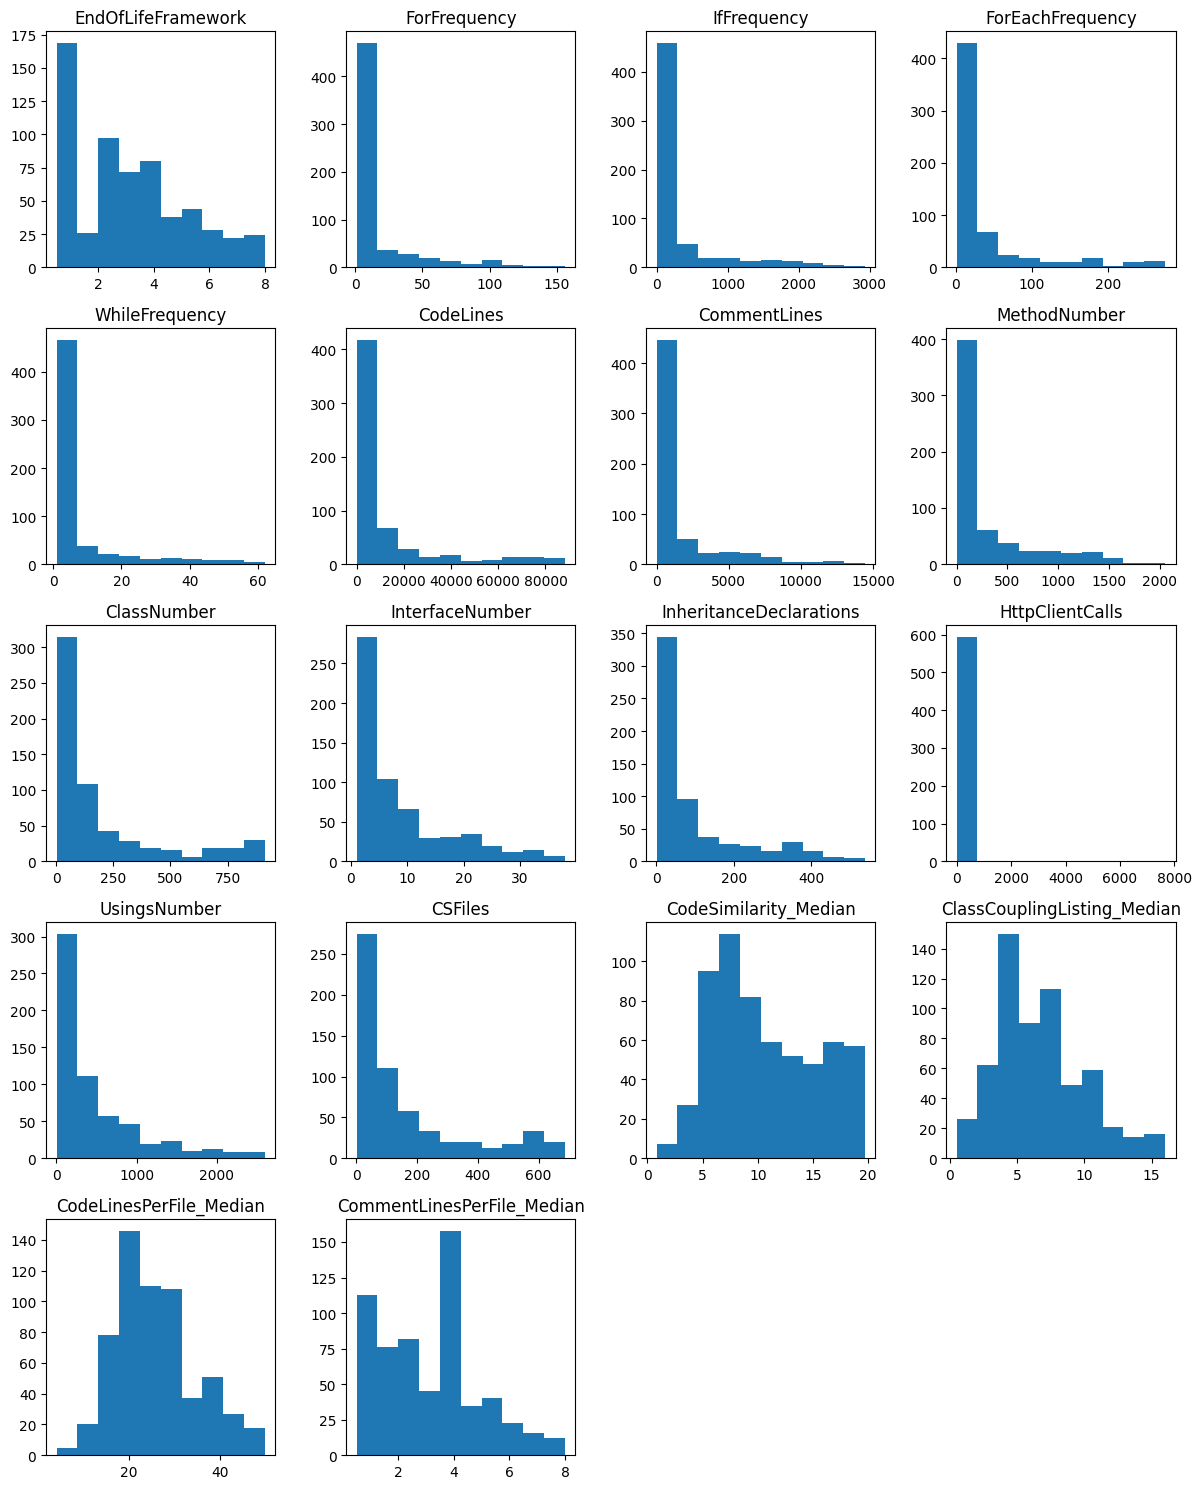

In [505]:
histograms(dfcopy)

In [506]:
dfcopy = combine_term_frequency(dfcopy)

In [507]:
dfcopy.describe()

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,3,12381,1516,296,194,9,95,61,479,165,11,7,26,3,367
std,2,20019,2723,413,247,9,123,362,556,187,5,3,9,2,645
min,0,11,1,1,1,1,1,-1,1,1,1,0,4,0,5
25%,1,1237,44,34,31,2,12,4,91,34,7,4,19,2,23
50%,3,3826,251,104,86,5,40,13,254,84,10,6,24,3,88
75%,4,12012,1506,351,232,12,119,27,669,214,15,8,32,4,297
max,8,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8,3354


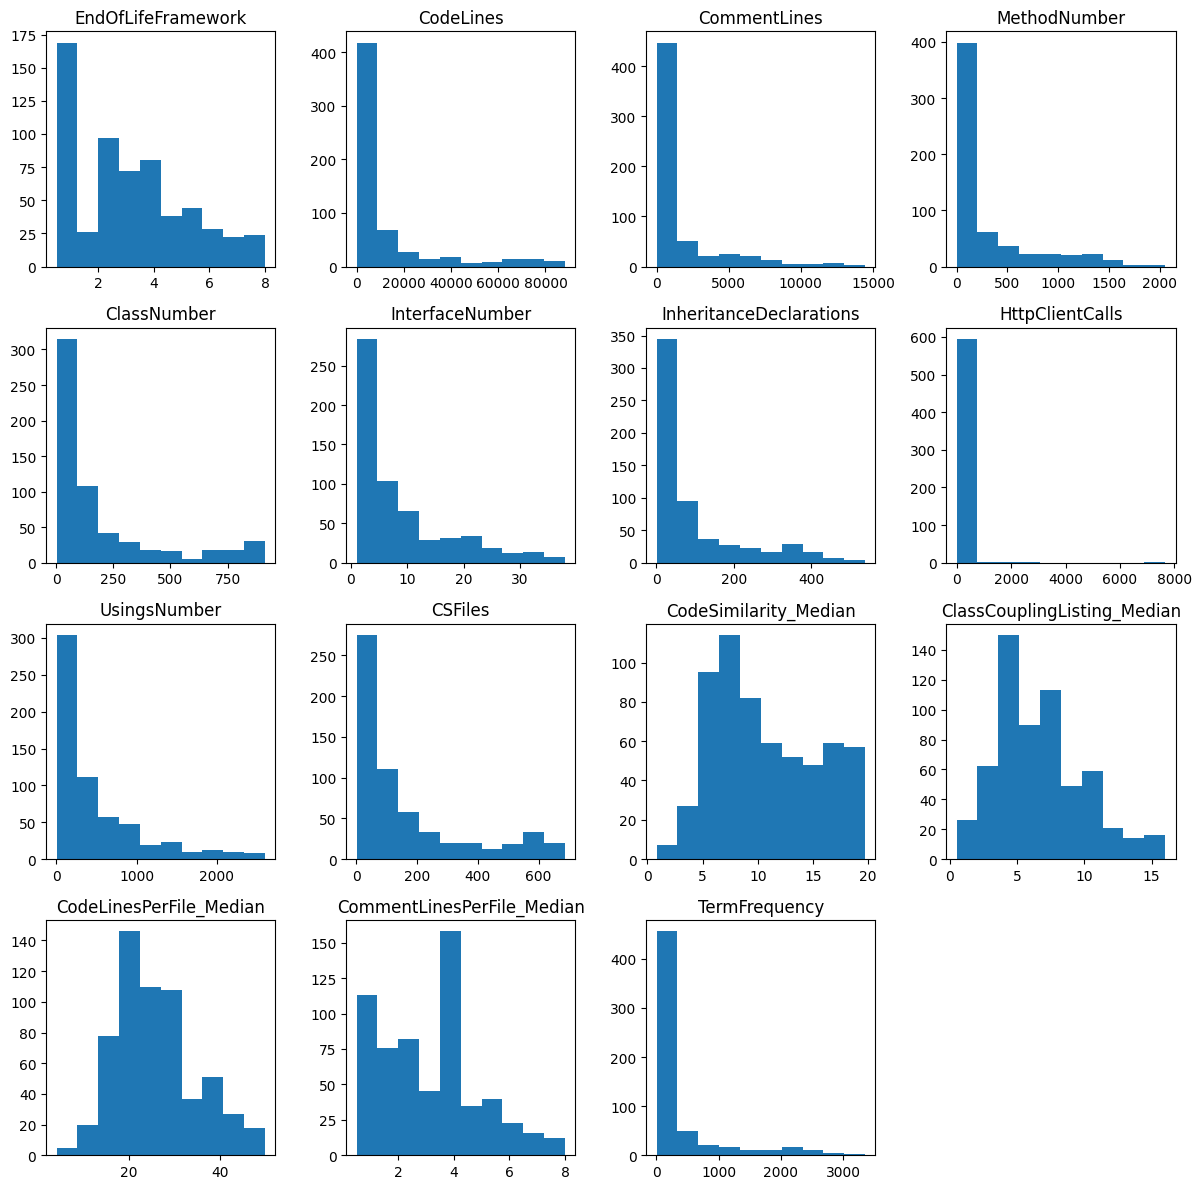

In [508]:
histograms(dfcopy)

In [509]:
columns = ['CodeLines', 'CommentLines', 'MethodNumber',
       'ClassNumber', 'InterfaceNumber','InheritanceDeclarations', 
       'UsingsNumber','HttpClientCalls', 'CSFiles','TermFrequency','CodeSimilarity_Median',
       'ClassCouplingListing_Median', 'CodeLinesPerFile_Median','CommentLinesPerFile_Median', 'TermFrequency','EndOfLifeFramework']
dfcopy = yeojohnson(columns, dfcopy)
print(dfcopy)

     EndOfLifeFramework  CodeLines  CommentLines  MethodNumber  ClassNumber  \
0                     1         11             8             7            6   
1                     2          8             4             4            5   
2                     1          8             5             4            5   
3                     1         10             6             5            6   
4                     2          8             1             3            4   
..                  ...        ...           ...           ...          ...   
595                   1         11             6             7            6   
596                   1          7             4             3            2   
597                   2          7             3             3            3   
598                   1          5             4             2            2   
599                   1          5             4             2            1   

     InterfaceNumber  InheritanceDeclarations  Http

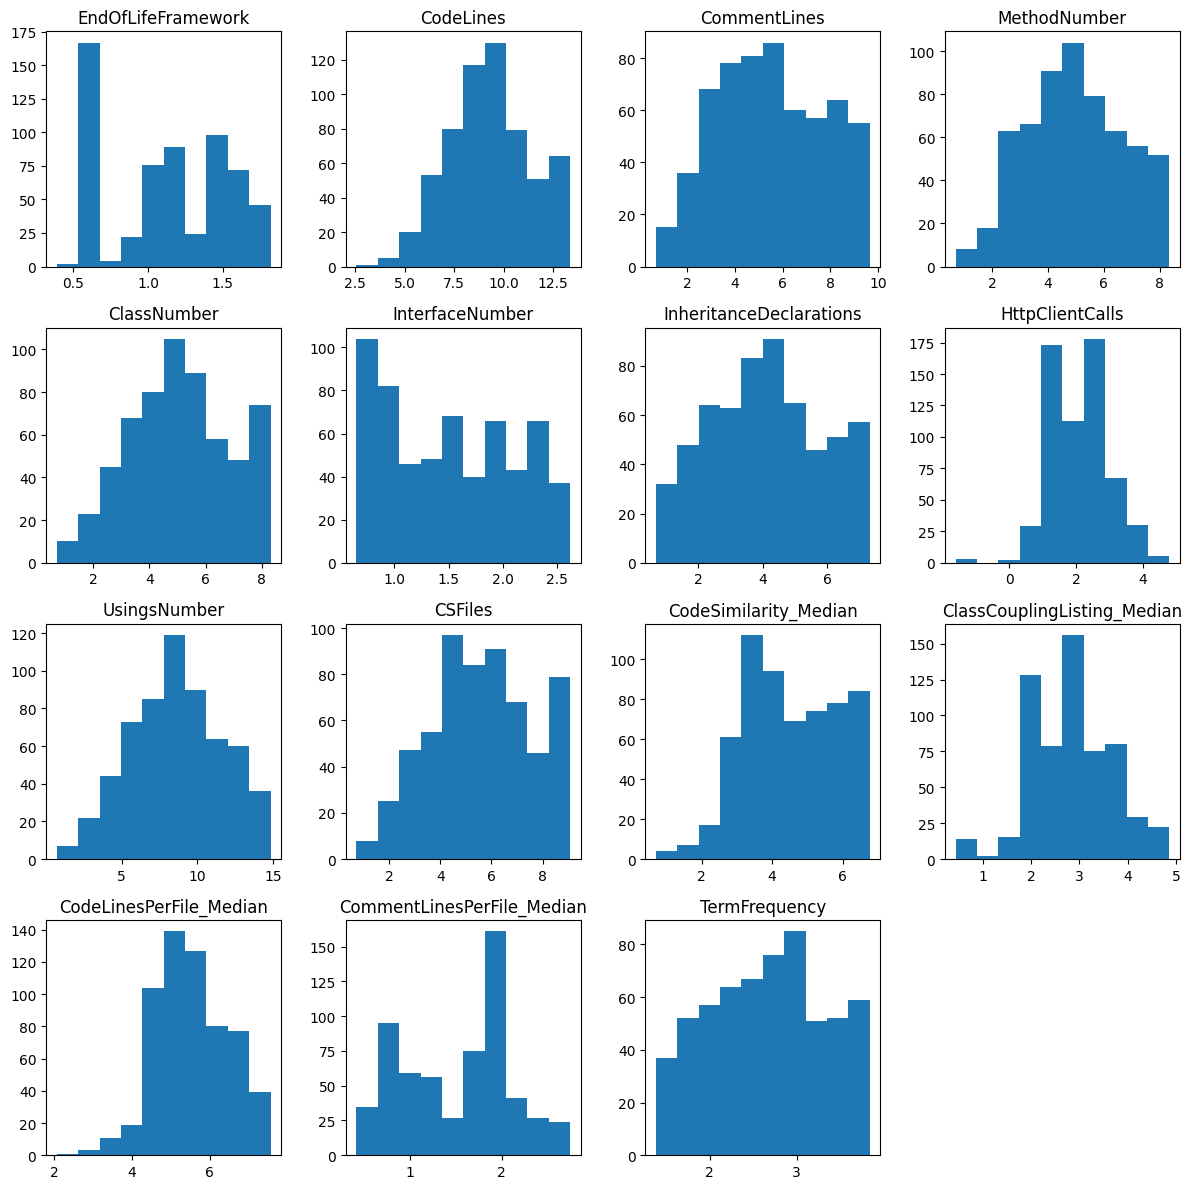

In [510]:
histograms(dfcopy)

In [511]:
column_std = dfcopy.std()

sorted_columns = column_std.sort_values(ascending=False)

print(sorted_columns)

UsingsNumber                  3
CommentLines                  2
CodeLines                     2
CSFiles                       2
ClassNumber                   2
MethodNumber                  2
InheritanceDeclarations       2
CodeSimilarity_Median         1
CodeLinesPerFile_Median       1
HttpClientCalls               1
ClassCouplingListing_Median   1
TermFrequency                 1
InterfaceNumber               1
CommentLinesPerFile_Median    1
EndOfLifeFramework            0
dtype: float64


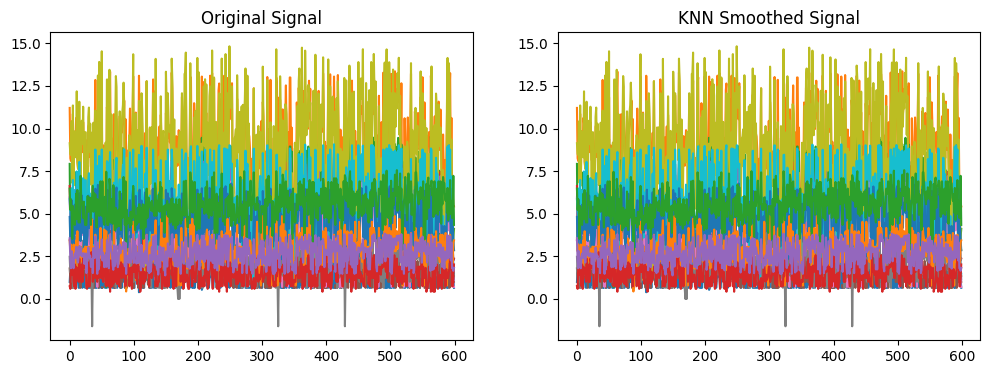

In [512]:
window_size_knn = 1

smoothed_signal_knn = knn_smoothing(dfcopy, window_size_knn)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(dfcopy)
plt.title('Original Signal')

plt.subplot(1, 2, 2)
plt.plot(smoothed_signal_knn)
plt.title('KNN Smoothed Signal')

plt.show()

In [513]:
print(smoothed_signal_knn)

[[ 0.99773793 11.20702654  7.92424166 ...  6.47048324  0.74242699
   3.56162401]
 [ 1.6927746   8.25720542  3.62106136 ...  5.23092098  0.59145277
   2.23132186]
 [ 1.47010269  8.092456    4.63169891 ...  5.85125706  1.82219531
   1.80154448]
 ...
 [ 1.73758207  6.67659245  2.83945549 ...  4.99911409  0.74242699
   1.80154448]
 [ 1.22829712  5.42170968  3.64788013 ...  7.22327726  1.22583059
   1.6503691 ]
 [ 0.65203886  5.42899898  4.10738908 ...  4.34306218  2.02403212
   1.82255603]]


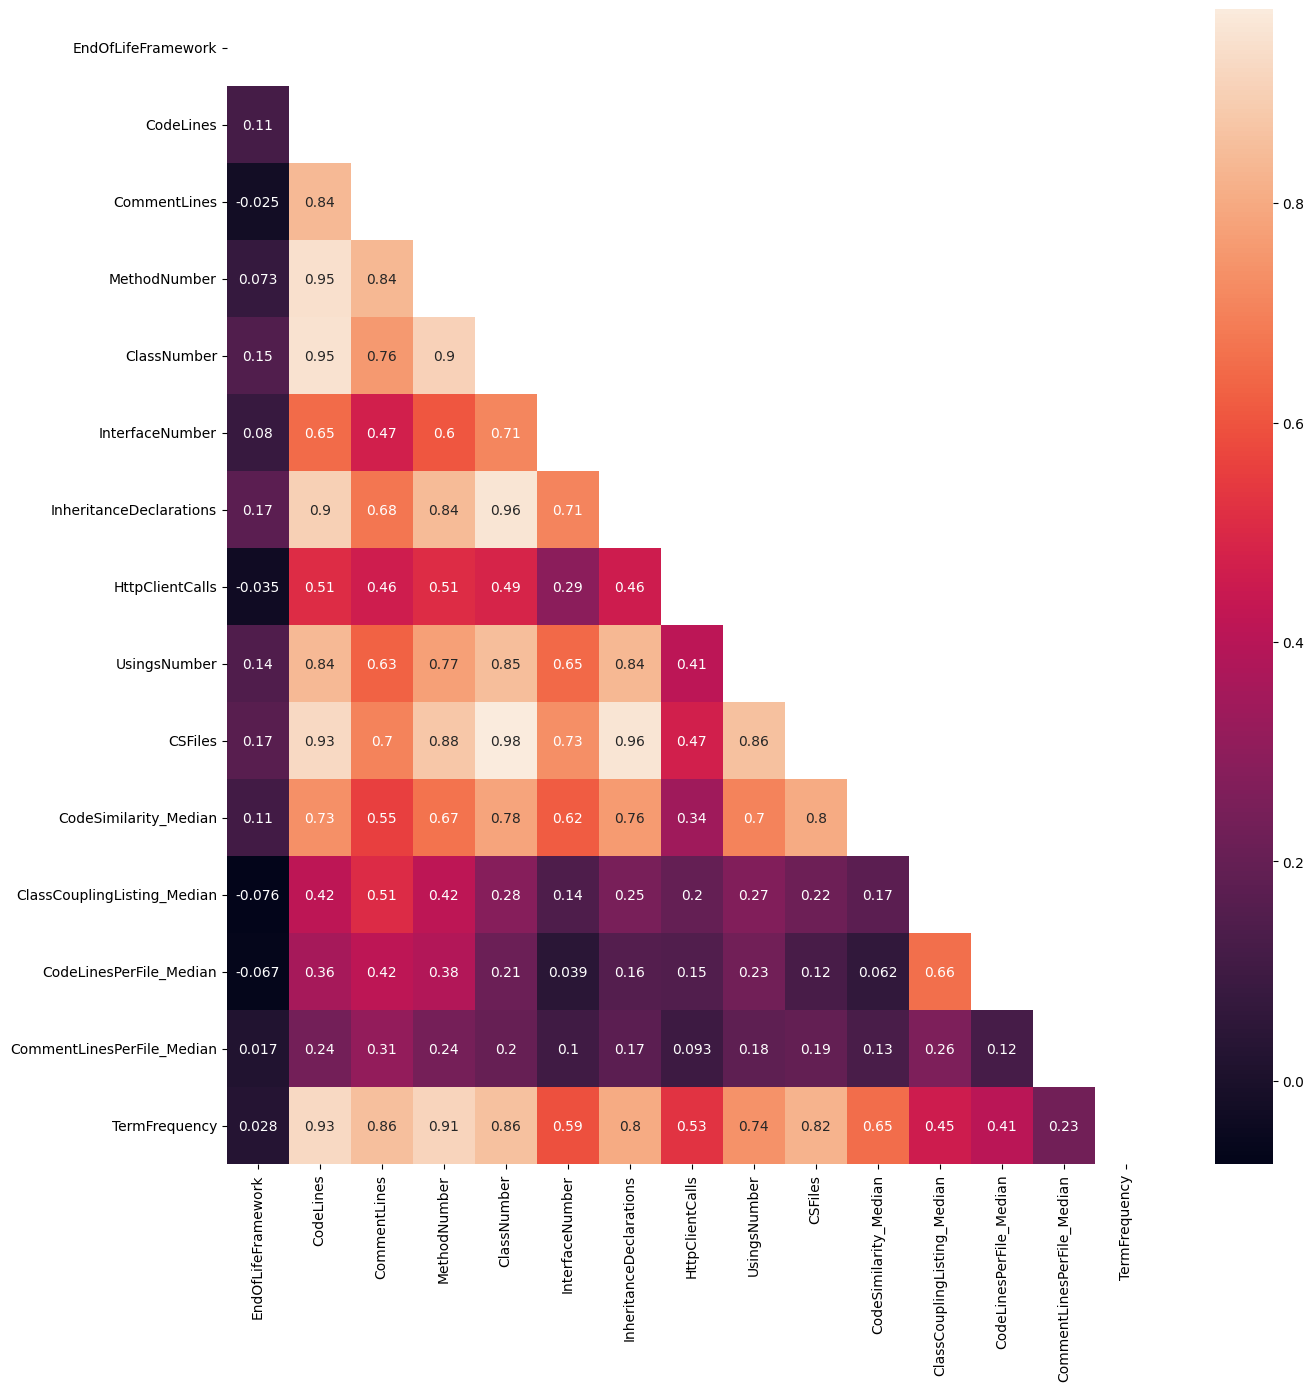

In [514]:
corr_m = dfcopy.corr()

mask = np.triu(corr_m)

plt.figure(figsize=(15,15))

sns.heatmap(corr_m, annot=True, mask=mask)
plt.show()

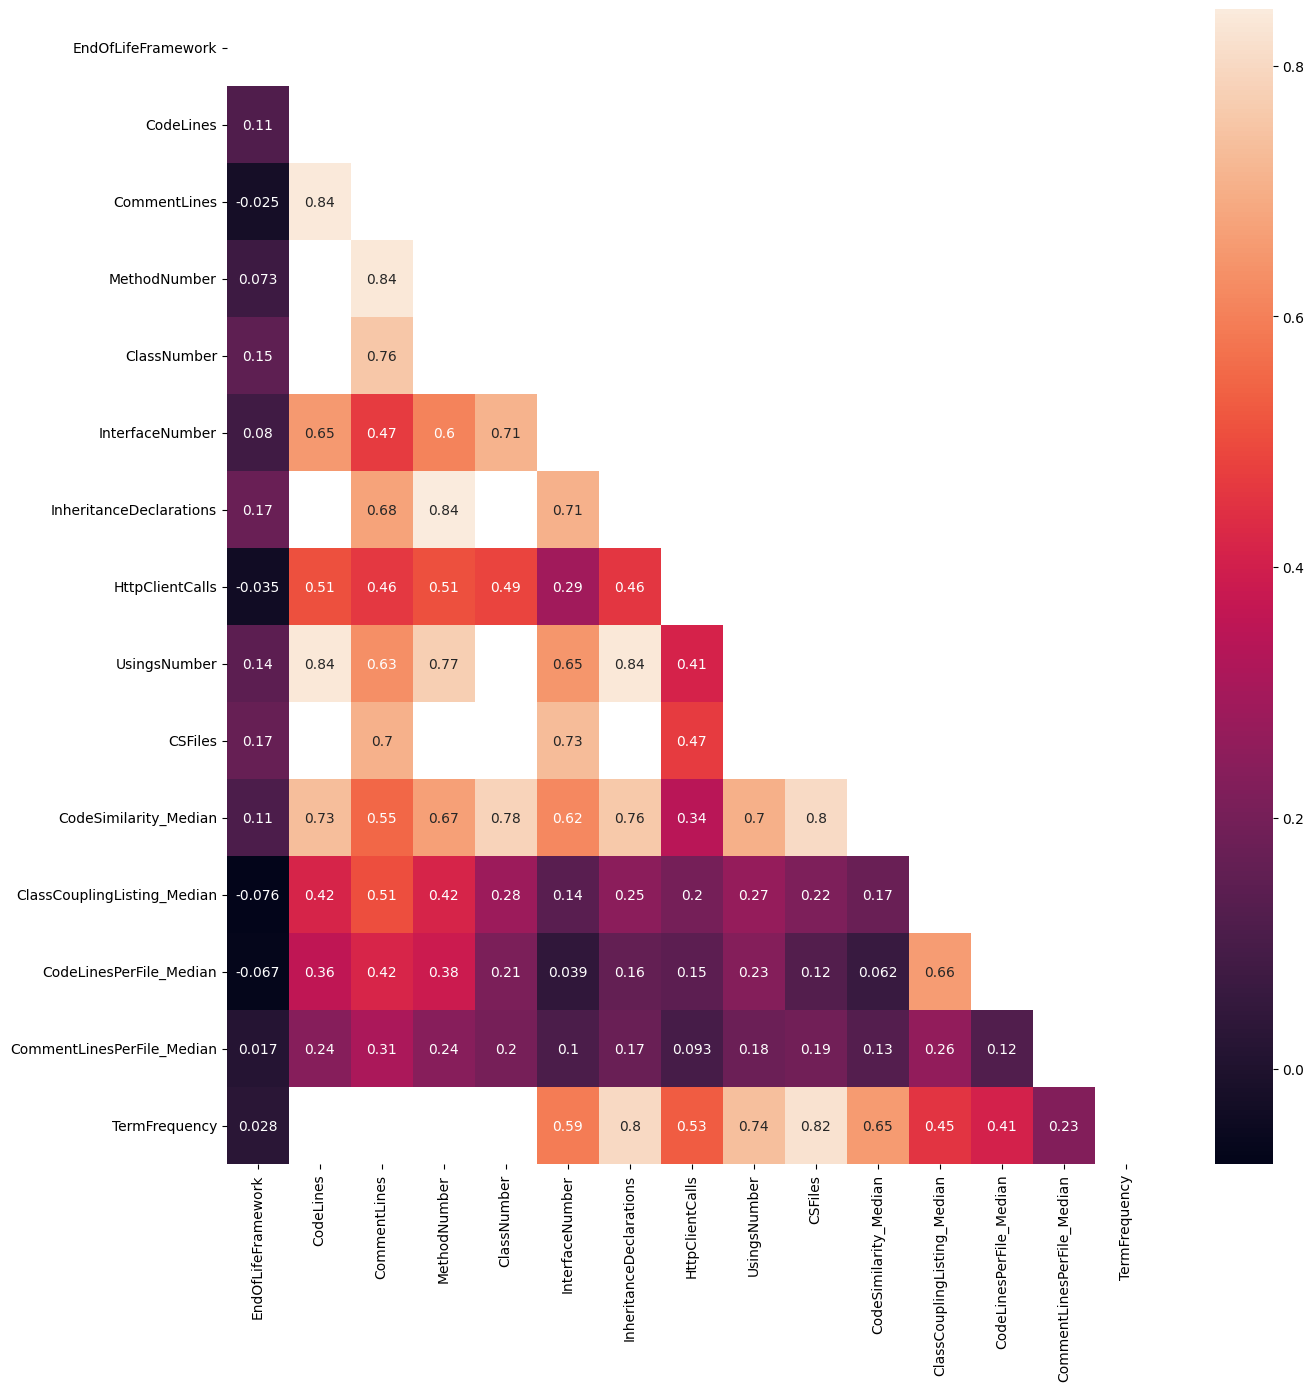

In [515]:
# Remove high correlation from sns
corr = (corr_m[(corr_m < 0.85)].dropna(thresh=2).dropna(thresh=2, axis=1))
mask = np.triu(corr)

plt.figure(figsize=(15,15))

sns.heatmap(corr, annot=True, mask=mask)
plt.show()

# PCA


In [516]:
knn_df = smoothed_signal_knn

In [517]:
# X_s = preprocessing.StandardScaler().fit_transform(knn_df)
# X_s = preprocessing.StandardScaler().fit_transform(knn_df)
X_s = knn_df
pcas = decomposition.PCA(n_components=2)
ress = pcas.fit_transform(X_s)
print(pcas.explained_variance_ratio_)
print('Explained variance: ', np.sum(pcas.explained_variance_ratio_))

[0.78588784 0.08023003]
Explained variance:  0.8661178750778628


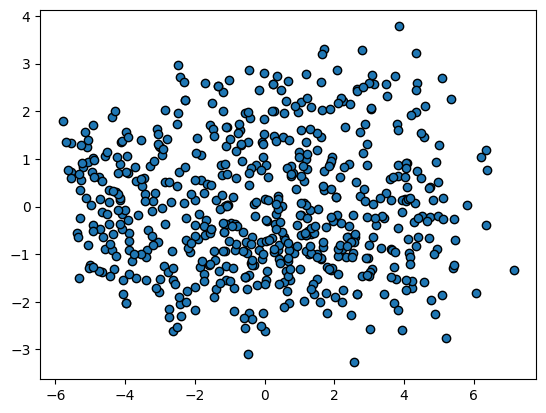

In [464]:
scatter = plt.scatter(ress[:, 0], ress[:, 1],edgecolors='black')
plt.show()

K Means

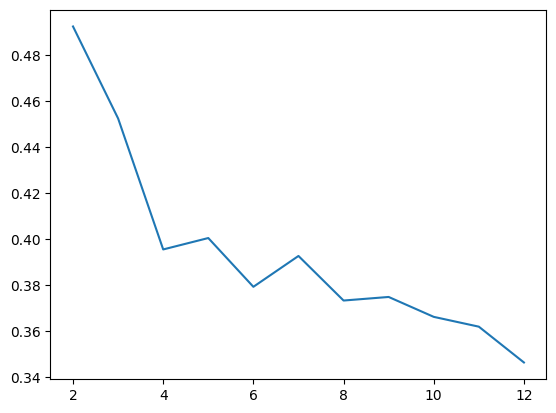

In [518]:
from sklearn.metrics import silhouette_score
silhouette = []
n_clusters = range(2,13)
for n in n_clusters:
    k_mean = cluster.KMeans(n_clusters=n, random_state=88, n_init=10)
    k_mean_clus = k_mean.fit_predict(ress)
    silhouette.append(silhouette_score(ress, k_mean.labels_))

plt.plot(n_clusters, silhouette)
plt.show()

## It can be seen that the elbow lies at 7

In [466]:
X_s

array([[-0.36024473,  0.91999425,  1.08458777, ...,  1.01387238,
        -1.32115046,  1.37007697],
       [ 1.46440278, -0.49805936, -0.84896028, ..., -0.32962061,
        -1.58020323, -0.66863248],
       [ 0.87983254, -0.57725857, -0.3948505 , ...,  0.34272736,
         0.53159621, -1.32727322],
       ...,
       [ 1.58203375, -1.25789999, -1.20015925, ..., -0.58086329,
        -1.32115046, -1.32727322],
       [ 0.2450316 , -1.86115387, -0.8369098 , ...,  1.8297842 ,
        -0.49169067, -1.55895193],
       [-1.26779246, -1.85764972, -0.63043864, ..., -1.29192169,
         0.87792279, -1.29507268]])

In [519]:
#Initialize the class object
kmeans = KMeans(n_clusters=7, n_init=seed, tol=1e-9, max_iter=1000 )
newpca = pcas.fit_transform(X_s)
means = kmeans.fit_predict(newpca)
centroids = kmeans.cluster_centers_

In [520]:
print(centroids)

[[ 7.85325123  0.16680216]
 [-2.92335671  1.84176324]
 [ 2.04431368  2.20922991]
 [-4.46659748 -1.67499458]
 [-8.18105295  0.32747145]
 [-0.34105897 -1.10278046]
 [ 3.51363003 -1.12331455]]


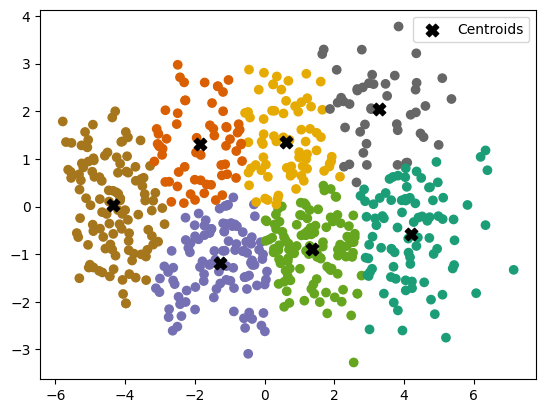

In [135]:
plt.scatter(newpca[:,0],newpca[:,1], c=means, cmap='Dark2')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 80, color='k', marker='X', label='Centroids')
plt.legend()
plt.show()

In [136]:

kmeans.predict(pcas.transform(knn_df))

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

# DBSCAN

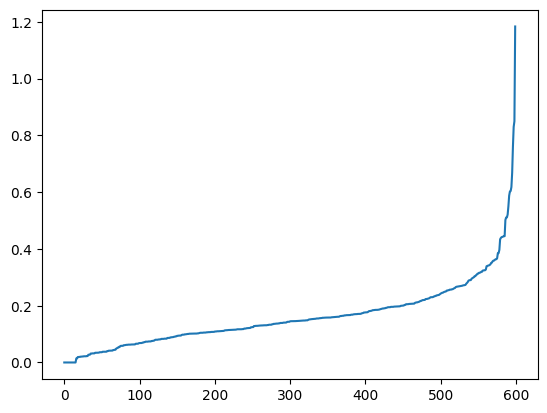

In [137]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=14)
neighbors_fit = neighbors.fit(ress)
distances, indices = neighbors_fit.kneighbors(ress)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [138]:
dbscan=DBSCAN(eps = 0.59, min_samples = 17)
yhat = dbscan.fit_predict(ress)
clusters = np.unique(yhat)
len(clusters)

5

## With noise

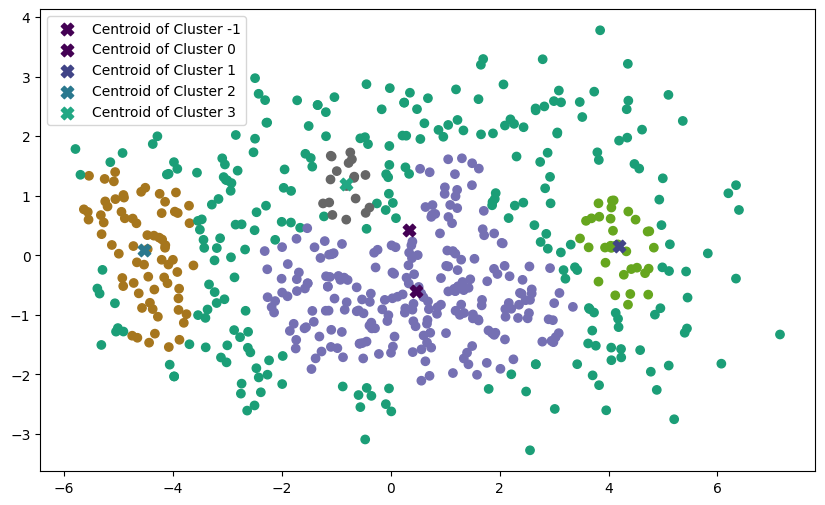

In [139]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(ress[:,0], ress[:,1] , c=yhat, cmap='Dark2')
plt.legend(handles=scatter.legend_elements(prop='colors' , num=len(clusters))[0], labels=list(unique(yhat)))

for cluster in clusters:
    cluster_points = ress[yhat == cluster]
    centroid = np.mean(cluster_points, axis=0)
    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color,
                label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

## After filtering out the noise

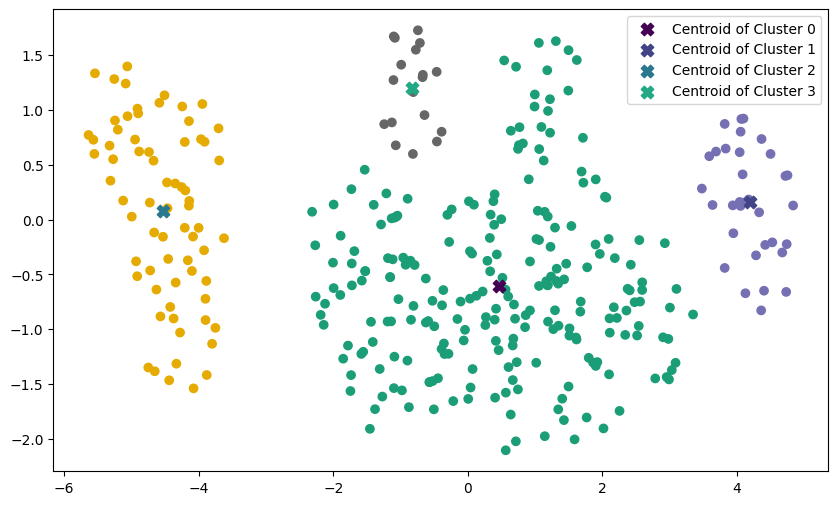

In [140]:
plt.figure(figsize=(10, 6))

filtered_points = ress[yhat != -1]
filtered_labels = yhat[yhat != -1]

scatter = plt.scatter(filtered_points[:, 0], filtered_points[:, 1], c=filtered_labels, cmap='Dark2')

plt.legend(handles=scatter.legend_elements(prop='colors' , num=len(clusters))[0], labels=list(unique(yhat)))

for cluster in clusters:
    if cluster != -1:
        cluster_points = ress[yhat == cluster]
        centroid = np.mean(cluster_points, axis=0)
        centroid_color = plt.cm.viridis(cluster / len(clusters))

        plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color,
                    label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# Gausian Mixture Clustering

[0 1 2]


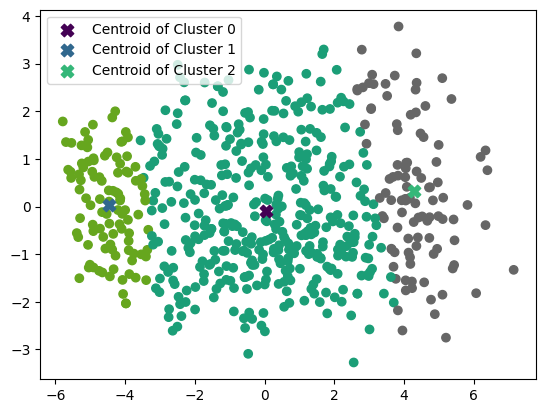

In [141]:
gaussian_mdl = GaussianMixture(n_components=3, random_state=42, tol=1e-9, max_iter=1000, means_init=np.array([ress[seed], ress[2 * seed], ress[3 * seed]]))
gaussian_mdl.fit(ress)
gaussian_res = gaussian_mdl.fit_predict(ress)

clusters = np.unique(gaussian_res) # get the unique clusters

scatter = plt.scatter(ress[:,0], ress[:,1] , c=gaussian_res, cmap='Dark2')
print(clusters)

for cluster in clusters:
    cluster_points = ress[gaussian_res == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

In [142]:
gaussian_res

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2,
       1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,

# Birch Clustering

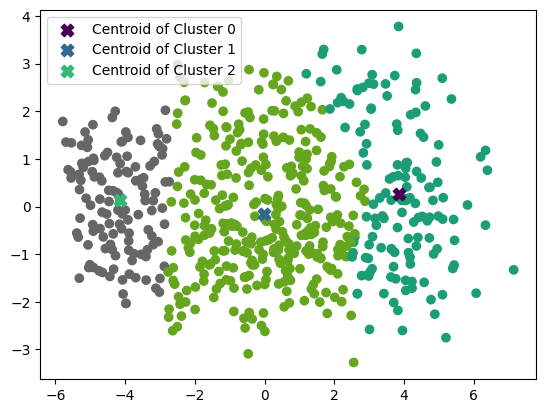

In [143]:
birch_model = Birch(branching_factor=50, n_clusters=3, threshold=1.75)
birch_model.fit(ress)
birch_res = birch_model.fit_predict(ress)

clusters = np.unique(birch_res) # get the clusters
scatter = plt.scatter(ress[:,0], ress[:,1] , c=birch_res, cmap='Dark2')


for cluster in clusters:
    cluster_points = ress[birch_res == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# Meanshift clustering

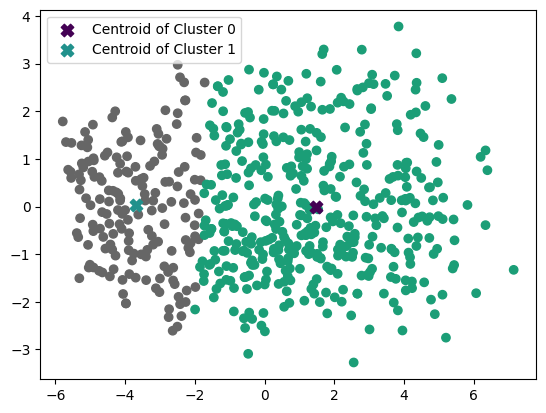

In [144]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=2)
meanshit_ress = ms.fit_predict(ress)
labels = ms.labels_
clusters = np.unique(meanshit_ress)
centers = ms.cluster_centers_
scatter = plt.scatter(ress[:,0], ress[:,1] , c=labels, cmap='Dark2')

for cluster in clusters:
    cluster_points = ress[meanshit_ress == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# Bayesian Gaussian Mixture

C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


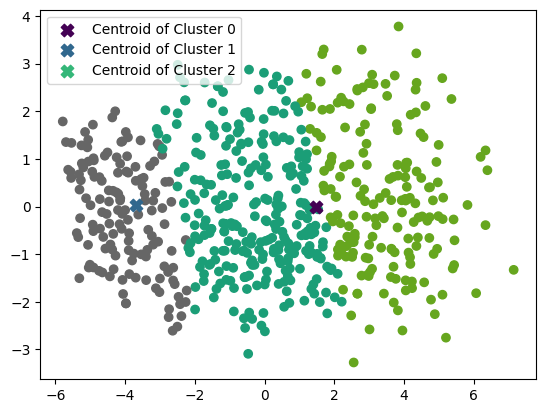

In [145]:
bgm = BayesianGaussianMixture(n_components=3, random_state=54)
bgm.fit(ress)
bgm_res = bgm.fit_predict(ress)
clusters = np.unique(bgm_res)

scatter = plt.scatter(ress[:,0], ress[:,1] , c=bgm_res, cmap='Dark2')

for cluster in clusters:
    cluster_points = ress[meanshit_ress == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# GM

## Extract points closest to centroids

In [146]:
gaussian_res

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2,
       1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,

In [147]:
clusters = np.unique(gaussian_res)

selected_points_in_clusters = {}

for cluster in clusters:
    cluster_indices = np.where(gaussian_res == cluster)[0]
    sorted_indices = np.argsort(cluster_indices)

    cluster_points = ress[cluster_indices[sorted_indices]]
    centroid = np.mean(cluster_points, axis=0)

    distances = np.linalg.norm(cluster_points - centroid, axis=1)

    # Top closest points to the centroids
    k = 5
    closest_indices = np.argsort(distances)[:k]
    closest_points = cluster_points[closest_indices]

    selected_points_in_clusters[cluster] = closest_points

for cluster, points in selected_points_in_clusters.items():
    print(f'{cluster} {points}')

0 [[ 0.03163573 -0.28885854]
 [ 0.06268368 -0.31049888]
 [ 0.08976494  0.13590354]
 [ 0.01596602  0.16704226]
 [ 0.32663737 -0.16758554]]
1 [[-4.46247534  0.10402207]
 [-4.52932775 -0.15658516]
 [-4.66086141 -0.11783125]
 [-4.20592143 -0.07451707]
 [-4.72493748  0.1552998 ]]
2 [[4.17156198 0.18310586]
 [4.08219133 0.41260815]
 [4.11383405 0.1568555 ]
 [4.32740211 0.06632178]
 [4.03877829 0.16082628]]


## Map points to rows and load them in a dataframe

In [148]:
original_rows = {}

for cluster, points in selected_points_in_clusters.items():
    print(points)
    original_indices = np.where(np.isin(ress, points).all(axis=1))[0]
    original_rows[cluster] = dataframe.iloc[original_indices]
    
for cluster, row in original_rows.items():
    print(f'{cluster} {row}')

[[ 0.03163573 -0.28885854]
 [ 0.06268368 -0.31049888]
 [ 0.08976494  0.13590354]
 [ 0.01596602  0.16704226]
 [ 0.32663737 -0.16758554]]
[[-4.46247534  0.10402207]
 [-4.52932775 -0.15658516]
 [-4.66086141 -0.11783125]
 [-4.20592143 -0.07451707]
 [-4.72493748  0.1552998 ]]
[[4.17156198 0.18310586]
 [4.08219133 0.41260815]
 [4.11383405 0.1568555 ]
 [4.32740211 0.06632178]
 [4.03877829 0.16082628]]
0                                Project_ID  \
81   60ffe53a-aa69-405a-bb88-028c2985b812   
106  a3598412-1ba2-4b7d-8c4d-f8721b92ad88   
114  df11bcb9-287f-4ac8-b0e8-6d5582e25719   
137  2b8c36b5-176d-4210-949f-df2fe0c17604   
167  a3f073ac-8338-4322-98d2-519d75853941   

                                     Project_Name  EndOfLifeFramework  \
81                 dotnet-architecture_eShopOnUWP                   1   
106                   GillCleeren_BethanysPieShop                   2   
114  henriquelourente_Domain-Driven-Design-Sample                  10   
137              jasontaylordev_Clean

In [149]:
gsm_clustered_df = pd.concat([df.assign(Cluster=cluster) for cluster, df in original_rows.items()])
gsm_clustered_df

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster
81,60ffe53a-aa69-405a-bb88-028c2985b812,dotnet-architecture_eShopOnUWP,1,2,203,12,0,5649,120,271,...,60,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",9,427,"[3, 7, 23, 1, 1, 8, 0, 4, 2, 0, 3, 3, 19, 26, ...","[19, 35, 198, 13, 14, 108, 9, 16, 18, 9, 19, 7...","[1, 2, 9, 0, 0, 3, 0, 0, 0, 0, 0, 0, 13, 0, 0,...","[94.18, 87.9, 94.93, 92.73, 9.15, 0.16, 0.38, ...",101,0
106,a3598412-1ba2-4b7d-8c4d-f8721b92ad88,GillCleeren_BethanysPieShop,2,0,71,11,0,3258,272,86,...,39,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,294,"[11, 6, 42, 2, 58, 24, 5, 5, 1, 4, 7, 2, 2, 3,...","[77, 23, 212, 23, 141, 66, 14, 8, 7, 29, 30, 2...","[12, 6, 20, 0, 57, 8, 3, 0, 0, 0, 0, 0, 0, 1, ...","[0.84, 1.48, 1.91, 0.86, 12.89, 0.1, 2.13, 2.8...",84,0
114,df11bcb9-287f-4ac8-b0e8-6d5582e25719,henriquelourente_Domain-Driven-Design-Sample,10,0,24,2,0,3308,133,134,...,60,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,379,"[3, 11, 2, 9, 11, 9, 4, 6, 6, 9, 6, 4, 7, 7, 7...","[24, 57, 11, 44, 61, 44, 22, 30, 30, 41, 23, 2...","[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[64.26, 60.27, 5.63, 1.32, 3.5, 1.71, 18.86, 3...",110,0
137,2b8c36b5-176d-4210-949f-df2fe0c17604,jasontaylordev_CleanArchitecture,0,0,48,7,0,4569,63,136,...,70,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,183,"[6, 13, 9, 14, 11, 10, 0, 5, 9, 2, 6, 3, 4, 6,...","[19, 6, 62, 28, 41, 23, 28, 5, 18, 8, 10, 5, 9...","[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.76, 1.4, 1.63, 2.21, 2.17, 0.0, 2.25, 2.09,...",117,0
167,a3f073ac-8338-4322-98d2-519d75853941,manuelzapata_CleanArchitectureCQRS,0,0,50,8,0,4016,47,106,...,68,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,242,"[6, 14, 9, 15, 12, 11, 0, 1, 5, 9, 5, 4, 6, 3,...","[19, 63, 28, 42, 24, 30, 5, 20, 18, 9, 6, 5, 5...","[0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.69, 1.47, 1.7, 2.32, 1.96, 0.01, 4.46, 2.53...",110,0
206,02e34866-2014-4774-89d9-6d5c2df9cae2,open-rpa_openrpa,0,173,8044,828,196,95713,11941,2495,...,539,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,6397,"[80, 40, 24, 6, 6, 2, 4, 15, 18, 45, 14, 258, ...","[964, 256, 58, 92, 60, 22, 43, 141, 125, 191, ...","[30, 14, 26, 5, 3, 0, 0, 1, 36, 73, 4, 6, 106,...","[25.59, 17.21, 17.6, 7.57, 44.54, 6.84, 3.29, ...",774,1
344,31bf10bb-322d-4d8e-86dc-6a7a790b909b,castleproject_Windsor,2,38,1816,311,22,67569,25414,3943,...,957,"[0, 15, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,...",0,40,"[36, 34, 17, 18, 17, 34, 29, 26, 18, 30, 18, 1...","[5, 98, 76, 10, 10, 10, 92, 45, 4, 20, 13, 68,...","[13, 13, 13, 13, 13, 13, 15, 13, 13, 14, 14, 1...","[2.49, 1.38, 1.59, 1.37, 1.36, 1.1, 1.11, 1.17...",1427,1
357,74736bc7-2c98-45a2-b880-2e362e287ddf,damienbod_ElasticsearchCRUD,4,41,436,114,14,43050,5617,1443,...,336,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",87,1330,"[8, 1, 9, 12, 1, 6, 7, 3, 12, 3, 4, 3, 9, 7, 5...","[51, 23, 27, 46, 15, 17, 21, 34, 15, 20, 125, ...","[12, 0, 14, 0, 17, 0, 8, 2, 17, 2, 6, 0, 2, 5,...","[0.0, 0.25, 1.46, 0.02, 0.65, 0.22, 8.51, 0.03...",503,1
403,a616fbd7-6f41-4c77-9a93-0e299bf2065a,gustavnavar_Grid.Blazor,0,75,1519,114,10,41561,5500,948,...,175,"[0, 0, 0, 0, 0, 0, 0, 0, 64, 0, 4, 5, 0, 0, 1,...",190,2032,"[140, 31, 17, 17, 69, 14, 28, 55, 54, 22, 16, ...","[1149, 220, 33, 116, 21, 7, 15, 59, 1195, 39, ...","[253, 3, 34, 225, 0, 0, 3, 4, 60, 3, 543, 0, 0...","[92.54, 19.02, 14.81, 6.37, 1.5, 1.72, 34.82, ...",489,1
563,2c9e01dd-3ec1-4340-868b-e6153f2c7f1e,StockSharp_StockSharp,0,105,7269,529,67,102381,31000,2920,...,705,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,391,"[28, 31, 29, 30, 6, 17, 178, 32, 17, 26, 57, 2...","[10, 36, 58, 104, 64, 11, 15, 30, 17, 128, 164...","[10, 24, 24, 53, 43, 15,

In [150]:
gsm_clustered_df = combine_term_frequency(gsm_clustered_df)

In [151]:
columns_to_plot = ['CodeLines','ClassNumber','ClassNumber','TermFrequency','CSFiles','Cluster']
gsm_clustered_df[columns_to_plot]

,CodeLines,ClassNumber,ClassNumber,TermFrequency,CSFiles,Cluster
81,5649,99,99,217,101,0
106,3258,86,86,82,84,0
114,3308,99,99,26,110,0
137,4569,114,114,55,117,0
167,4016,102,102,58,110,0
206,95713,1001,1001,9241,774,1
344,67569,1573,1573,2187,1427,1
357,43050,699,699,605,503,1
403,41561,464,464,1718,489,1
563,102381,999,999,7970,744,1


# K Means

In [295]:
newpca = pcas.fit_transform(X_s)

# initial_centroids = np.array([newpca[seed], newpca[2 * seed], newpca[3 * seed], newpca[4 * seed], newpca[5 * seed], newpca[6 * seed], newpca[7 * seed]])
kmeans = KMeans(n_clusters=7, init=initial_centroids, n_init=1, tol=1e-9, max_iter=1000)
means = kmeans.fit_predict(newpca)

centroids = kmeans.cluster_centers_

0 {'Centroid': (1.8956175942733848, -0.76711071911079), 'ClosestPoint': (1.6769640293639239, -0.7484065153941851)}
1 {'Centroid': (-4.360244459647435, 0.3672584983255758), 'ClosestPoint': (-4.348163005032233, 0.3298518246863696)}
2 {'Centroid': (2.8212330931484653, 2.0596828288207325), 'ClosestPoint': (3.0580794276430776, 2.0436872009977214)}
3 {'Centroid': (4.416750733177785, -0.4424711022006229), 'ClosestPoint': (4.280996876343651, -0.32636609522890075)}
4 {'Centroid': (-0.2425488999010234, -0.962841350914666), 'ClosestPoint': (-0.15503049821572906, -0.9071441286925236)}
5 {'Centroid': (-2.479783887913792, -0.9328165915295118), 'ClosestPoint': (-2.6649943675717367, -0.9312484489370315)}
6 {'Centroid': (-0.44047189063617653, 1.5937459783986216), 'ClosestPoint': (-0.4634775061637828, 1.3484139195314353)}


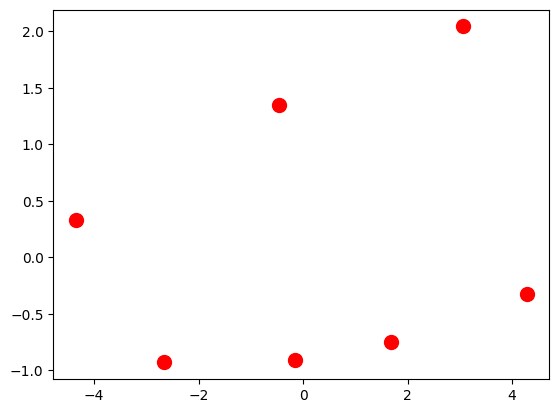

In [296]:
selected_points_in_clusters_km = {}

for i, centroid in enumerate(centroids):
    cluster_points = newpca[means == i]
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    closest_point = cluster_points[closest_point_index]

    centroid_tuple = tuple(centroid)
    closest_point_tuple = tuple(closest_point)

    selected_points_in_clusters_km[i] = {'Centroid': centroid_tuple, 'ClosestPoint': closest_point_tuple}
    plt.scatter(closest_point[0], closest_point[1], s=100, color='red', marker='o', label=f'Closest Point to Centroid {i}')


for cluster, points in selected_points_in_clusters_km.items():
    print(f'{cluster} {points}')

## Map points to rows

In [154]:
original_rows = {}

for cluster, points_info in selected_points_in_clusters_km.items():
    closest_point_tuple = points_info['ClosestPoint']
    distances = np.linalg.norm(ress - np.array(closest_point_tuple), axis=1)
    closest_index = np.argmin(distances)
    original_rows[cluster] = dataframe.iloc[closest_index]

for cluster, row in original_rows.items():
    print(f'{cluster} {row}')

0 Project_ID                              b695920c-fbf6-4dc6-91fb-93c73dd19347
Project_Name                            Elfocrash_DotnetDocsShow.MinimalApis
EndOfLifeFramework                                                         0
ForFrequency                                                               0
IfFrequency                                                               22
ForEachFrequency                                                           6
WhileFrequency                                                             0
CodeLines                                                               1127
CommentLines                                                              30
MethodNumber                                                              60
ClassNumber                                                               38
InterfaceNumber                                                            8
InheritanceDeclarations                                                   

In [155]:
kmeans_clustered_df = pd.DataFrame(original_rows.values())
kmeans_clustered_df['Cluster'] = original_rows.keys()
kmeans_clustered_df

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster
91,b695920c-fbf6-4dc6-91fb-93c73dd19347,Elfocrash_DotnetDocsShow.MinimalApis,0,0,22,6,0,1127,30,60,...,18,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,50,"[7, 1, 12, 5, 2, 9, 9, 3, 1, 5, 2, 16, 3, 8, 2...","[2, 9, 43, 6, 59, 34, 10, 9, 3, 30, 6, 6, 47, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.32, 0.79, 2.04, 0.08, 0.18, 0.41, 0.0, 0.2,...",55,0
547,c5be047d-5236-4de6-9f81-cb8d16d91586,SharpRepository_SharpRepository,4,122,911,74,3,28583,2348,1483,...,194,"[0, 12, 0, 0, 0, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,1608,"[11, 5, 12, 1, 13, 4, 28, 1, 4, 8, 4, 13, 8, 1...","[35, 18, 89, 37, 43, 11, 109, 38, 21, 27, 45, ...","[0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, ...","[40.84, 25.16, 28.15, 5.7, 68.4, 22.5, 19.47, ...",426,1
100,112590ad-2197-4660-9a0d-ababdb3f1636,Fryingpannn_.NETCore_MVC_RESTAPI,1,0,8,0,0,478,127,23,...,7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,64,"[3, 25, 47, 11, 21, 10, 5, 2, 3, 5, 10, 10, 5,...","[24, 62, 99, 12, 16, 38, 44, 14, 10, 14, 29, 4...","[0, 15, 50, 6, 9, 7, 12, 5, 2, 1, 4, 1, 1, 7, 7]","[8.11, 0.65, 0.53, 27.39, 0.43, 0.32, 0.0, 23....",15,2
349,641cac70-87f1-4645-9623-2824de6bcd25,cornflourblue_aspnet-core-3-jwt-refresh-tokens...,1,0,12,0,0,384,25,17,...,3,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,40,"[3, 18, 15, 5, 3, 0, 4, 1, 2, 0, 10]","[19, 66, 88, 23, 16, 7, 10, 11, 24, 7, 113]","[1, 10, 2, 0, 0, 0, 0, 0, 1, 0, 11]","[9.35, 7.06, 0.65, 14.61, 8.24, 15.48, 5.62, 3...",11,3
205,1fcf32fb-b372-4577-9e0d-191f2e449b0d,omid-ahmadpour_CleanArchitecture-Template,0,0,71,14,0,4809,98,103,...,59,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,322,"[3, 2, 6, 12, 11, 12, 1, 1, 1, 5, 1, 4, 0, 2, ...","[21, 74, 12, 12, 20, 31, 29, 30, 23, 23, 23, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2.46, 2.43, 2.11, 2.65, 3.49, 3.76, 1.29, 3.2...",109,4
218,aa1d0b81-2ed5-48dc-86d0-e8caf1eb109a,phongnguyend_DddDotNet,3,22,222,29,16,11687,67,459,...,104,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11,972,"[12, 17, 8, 3, 10, 10, 10, 10, 1, 11, 11, 16, ...","[58, 63, 81, 17, 29, 29, 25, 6, 10, 29, 8, 26,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5.76, 7.12, 7.32, 2.25, 1.62, 1.22, 28.15, 21...",332,5
524,4a4ef1dd-8277-45e2-97d5-33855d252ed4,RehanSaeed_Serilog.Exceptions,0,3,103,13,2,3428,542,131,...,47,"[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,233,"[4, 15, 15, 7, 2, 2, 6, 13, 25, 6, 32, 15, 13,...","[27, 26, 63, 47, 10, 6, 4, 23, 40, 48, 84, 98,...","[0, 8, 0, 2, 2, 0, 0, 8, 18, 32, 8, 65, 16, 24...","[0.0, 0.09, 5.8, 0.11, 0.59, 0.82, 0.07, 0.99,...",65,6


In [156]:
kmeans_clustered_df = combine_term_frequency(kmeans_clustered_df)

In [157]:
most_important_component_index = pcas.explained_variance_ratio_.argmax()
loadings = pcas.components_[most_important_component_index]
feature_names = dfcopy.columns
most_important_loadings = dict(zip(feature_names, loadings))
most_important_loadings_sorted = sorted(most_important_loadings.items(), key=lambda kv: kv[1], reverse=True)
for feature in most_important_loadings_sorted:
    print(f"{feature}")

('EndOfLifeFramework', -0.0374493682906909)
('CommentLinesPerFile_Median', -0.08876360104887325)
('CodeLinesPerFile_Median', -0.1136133418012289)
('ClassCouplingListing_Median', -0.1420935006860616)
('HttpClientCalls', -0.18537708620033086)
('InterfaceNumber', -0.24375576124342427)
('CodeSimilarity_Median', -0.2669158849872755)
('CommentLines', -0.2848934050355732)
('UsingsNumber', -0.29540896189468574)
('TermFrequency', -0.31464004835731757)
('InheritanceDeclarations', -0.31547390927233776)
('MethodNumber', -0.3209247362060918)
('CSFiles', -0.32243102084691666)
('ClassNumber', -0.32882859976636747)
('CodeLines', -0.3325038897291366)


In [158]:
features = most_important_loadings_sorted[:5]
features
columns_to_plot = ['CodeLines','ClassNumber','ClassNumber','TermFrequency','CSFiles','Cluster']

In [159]:
kmeans_clustered_df

,Project_ID,Project_Name,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster,TermFrequency
91,b695920c-fbf6-4dc6-91fb-93c73dd19347,Elfocrash_DotnetDocsShow.MinimalApis,0,1127,30,60,38,8,18,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,50,"[7, 1, 12, 5, 2, 9, 9, 3, 1, 5, 2, 16, 3, 8, 2...","[2, 9, 43, 6, 59, 34, 10, 9, 3, 30, 6, 6, 47, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.32, 0.79, 2.04, 0.08, 0.18, 0.41, 0.0, 0.2,...",55,0,28
547,c5be047d-5236-4de6-9f81-cb8d16d91586,SharpRepository_SharpRepository,4,28583,2348,1483,576,20,194,"[0, 12, 0, 0, 0, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,1608,"[11, 5, 12, 1, 13, 4, 28, 1, 4, 8, 4, 13, 8, 1...","[35, 18, 89, 37, 43, 11, 109, 38, 21, 27, 45, ...","[0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, ...","[40.84, 25.16, 28.15, 5.7, 68.4, 22.5, 19.47, ...",426,1,1110
100,112590ad-2197-4660-9a0d-ababdb3f1636,Fryingpannn_.NETCore_MVC_RESTAPI,1,478,127,23,21,1,7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,64,"[3, 25, 47, 11, 21, 10, 5, 2, 3, 5, 10, 10, 5,...","[24, 62, 99, 12, 16, 38, 44, 14, 10, 14, 29, 4...","[0, 15, 50, 6, 9, 7, 12, 5, 2, 1, 4, 1, 1, 7, 7]","[8.11, 0.65, 0.53, 27.39, 0.43, 0.32, 0.0, 23....",15,2,8
349,641cac70-87f1-4645-9623-2824de6bcd25,cornflourblue_aspnet-core-3-jwt-refresh-tokens...,1,384,25,17,11,1,3,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,40,"[3, 18, 15, 5, 3, 0, 4, 1, 2, 0, 10]","[19, 66, 88, 23, 16, 7, 10, 11, 24, 7, 113]","[1, 10, 2, 0, 0, 0, 0, 0, 1, 0, 11]","[9.35, 7.06, 0.65, 14.61, 8.24, 15.48, 5.62, 3...",11,3,12
205,1fcf32fb-b372-4577-9e0d-191f2e449b0d,omid-ahmadpour_CleanArchitecture-Template,0,4809,98,103,109,6,59,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,322,"[3, 2, 6, 12, 11, 12, 1, 1, 1, 5, 1, 4, 0, 2, ...","[21, 74, 12, 12, 20, 31, 29, 30, 23, 23, 23, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2.46, 2.43, 2.11, 2.65, 3.49, 3.76, 1.29, 3.2...",109,4,85
218,aa1d0b81-2ed5-48dc-86d0-e8caf1eb109a,phongnguyend_DddDotNet,3,11687,67,459,348,24,104,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11,972,"[12, 17, 8, 3, 10, 10, 10, 10, 1, 11, 11, 16, ...","[58, 63, 81, 17, 29, 29, 25, 6, 10, 29, 8, 26,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5.76, 7.12, 7.32, 2.25, 1.62, 1.22, 28.15, 21...",332,5,289
524,4a4ef1dd-8277-45e2-97d5-33855d252ed4,RehanSaeed_Serilog.Exceptions,0,3428,542,131,89,4,47,"[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,233,"[4, 15, 15, 7, 2, 2, 6, 13, 25, 6, 32, 15, 13,...","[27, 26, 63, 47, 10, 6, 4, 23, 40, 48, 84, 98,...","[0, 8, 0, 2, 2, 0, 0, 8, 18, 32, 8, 65, 16, 24...","[0.0, 0.09, 5.8, 0.11, 0.59, 0.82, 0.07, 0.99,...",65,6,121


In [160]:
kmeans_clustered_df[columns_to_plot]

,CodeLines,ClassNumber,ClassNumber,TermFrequency,CSFiles,Cluster
91,1127,38,38,28,55,0
547,28583,576,576,1110,426,1
100,478,21,21,8,15,2
349,384,11,11,12,11,3
205,4809,109,109,85,109,4
218,11687,348,348,289,332,5
524,3428,89,89,121,65,6


Trying a supervised learning model by using the cluster labels

In [161]:
gaussian_df = dfcopy
gaussian_df['Cluster_Labels'] = gaussian_res
gaussian_df

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels
0,1,11,8,7,6,2,3,2,9,6,5,3,6,1,4,0
1,2,8,4,4,5,1,4,2,9,5,3,3,5,1,2,0
2,1,8,5,4,5,1,4,2,8,5,3,3,6,2,2,0
3,1,10,6,5,6,2,5,1,10,6,6,3,5,2,3,0
4,2,8,1,3,4,1,3,2,7,5,4,3,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,11,6,7,6,2,5,1,9,7,5,3,6,2,3,0
596,1,7,4,3,2,1,2,1,3,3,3,3,5,1,2,2
597,2,7,3,3,3,1,2,1,6,3,4,2,5,1,2,0
598,1,5,4,2,2,1,1,1,3,1,3,3,7,1,2,2


Confusion matrix

Prediction: The source code does not have technical debt

True Positive: The source code does not have technical debt

True Negative: The source code has technical debt

False Positive: The source code has technical debt, despite claiming it doesn't

False Negative: The source code doesn't have technical debt, despite claiming it does

In [162]:
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")
 
# ax.scatter3D(ressdbscan[:,0], ressdbscan[:,1],ressdbscan[:,2] , c=yhat)
 
# plt.show()

This saves the trained model into a pickle file that can then be loaded into the main system and used

## Manually labeling the projects from KMeans output

In [163]:
kmeans_clustered_df
labels = [1, 2, 1, 0, 1, 3, 0]

clusters_nr = np.arange(7)
label_to_cluster_mapping = dict(zip(clusters_nr, labels))

means = means.reshape(-1, 1)

# concatinating the means to the result_df
test = np.concatenate([dfcopy, means], axis=1)
result_df = pd.DataFrame(test, columns=list(dfcopy.columns) + ['Means'])

for key, val in label_to_cluster_mapping.items():
    result_df.loc[result_df['Means'] == key, 'Label'] = val


In [164]:
result_df

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels,Means,Label
0,1,11,8,7,6,2,3,2,9,6,5,3,6,1,4,0,6,0
1,2,8,4,4,5,1,4,2,9,5,3,3,5,1,2,0,0,1
2,1,8,5,4,5,1,4,2,8,5,3,3,6,2,2,0,0,1
3,1,10,6,5,6,2,5,1,10,6,6,3,5,2,3,0,4,1
4,2,8,1,3,4,1,3,2,7,5,4,3,4,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,11,6,7,6,2,5,1,9,7,5,3,6,2,3,0,5,3
596,1,7,4,3,2,1,2,1,3,3,3,3,5,1,2,2,3,0
597,2,7,3,3,3,1,2,1,6,3,4,2,5,1,2,0,3,0
598,1,5,4,2,2,1,1,1,3,1,3,3,7,1,2,2,2,1


In [165]:
label_to_cluster_mapping

{0: 1, 1: 2, 2: 1, 3: 0, 4: 1, 5: 3, 6: 0}

In [166]:
result_df.head(20)

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels,Means,Label
0,1,11,8,7,6,2,3,2,9,6,5,3,6,1,4,0,6,0
1,2,8,4,4,5,1,4,2,9,5,3,3,5,1,2,0,0,1
2,1,8,5,4,5,1,4,2,8,5,3,3,6,2,2,0,0,1
3,1,10,6,5,6,2,5,1,10,6,6,3,5,2,3,0,4,1
4,2,8,1,3,4,1,3,2,7,5,4,3,4,1,2,0,0,1
5,2,11,4,6,6,1,5,3,11,7,5,2,5,2,2,0,4,1
6,1,7,3,3,3,1,2,1,7,4,3,3,5,1,2,2,3,0
7,1,9,3,5,6,2,5,3,10,6,5,3,5,1,2,0,4,1
8,1,9,6,5,5,2,4,2,8,6,6,2,4,2,3,0,4,1
9,1,9,4,5,5,2,4,2,9,6,4,2,5,1,2,0,4,1


In [167]:
dfcopy

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels
0,1,11,8,7,6,2,3,2,9,6,5,3,6,1,4,0
1,2,8,4,4,5,1,4,2,9,5,3,3,5,1,2,0
2,1,8,5,4,5,1,4,2,8,5,3,3,6,2,2,0
3,1,10,6,5,6,2,5,1,10,6,6,3,5,2,3,0
4,2,8,1,3,4,1,3,2,7,5,4,3,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,11,6,7,6,2,5,1,9,7,5,3,6,2,3,0
596,1,7,4,3,2,1,2,1,3,3,3,3,5,1,2,2
597,2,7,3,3,3,1,2,1,6,3,4,2,5,1,2,0
598,1,5,4,2,2,1,1,1,3,1,3,3,7,1,2,2


In [168]:
kmeans_clustered_df

,Project_ID,Project_Name,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster,TermFrequency
91,b695920c-fbf6-4dc6-91fb-93c73dd19347,Elfocrash_DotnetDocsShow.MinimalApis,0,1127,30,60,38,8,18,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,50,"[7, 1, 12, 5, 2, 9, 9, 3, 1, 5, 2, 16, 3, 8, 2...","[2, 9, 43, 6, 59, 34, 10, 9, 3, 30, 6, 6, 47, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.32, 0.79, 2.04, 0.08, 0.18, 0.41, 0.0, 0.2,...",55,0,28
547,c5be047d-5236-4de6-9f81-cb8d16d91586,SharpRepository_SharpRepository,4,28583,2348,1483,576,20,194,"[0, 12, 0, 0, 0, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0,1608,"[11, 5, 12, 1, 13, 4, 28, 1, 4, 8, 4, 13, 8, 1...","[35, 18, 89, 37, 43, 11, 109, 38, 21, 27, 45, ...","[0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, ...","[40.84, 25.16, 28.15, 5.7, 68.4, 22.5, 19.47, ...",426,1,1110
100,112590ad-2197-4660-9a0d-ababdb3f1636,Fryingpannn_.NETCore_MVC_RESTAPI,1,478,127,23,21,1,7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,64,"[3, 25, 47, 11, 21, 10, 5, 2, 3, 5, 10, 10, 5,...","[24, 62, 99, 12, 16, 38, 44, 14, 10, 14, 29, 4...","[0, 15, 50, 6, 9, 7, 12, 5, 2, 1, 4, 1, 1, 7, 7]","[8.11, 0.65, 0.53, 27.39, 0.43, 0.32, 0.0, 23....",15,2,8
349,641cac70-87f1-4645-9623-2824de6bcd25,cornflourblue_aspnet-core-3-jwt-refresh-tokens...,1,384,25,17,11,1,3,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,40,"[3, 18, 15, 5, 3, 0, 4, 1, 2, 0, 10]","[19, 66, 88, 23, 16, 7, 10, 11, 24, 7, 113]","[1, 10, 2, 0, 0, 0, 0, 0, 1, 0, 11]","[9.35, 7.06, 0.65, 14.61, 8.24, 15.48, 5.62, 3...",11,3,12
205,1fcf32fb-b372-4577-9e0d-191f2e449b0d,omid-ahmadpour_CleanArchitecture-Template,0,4809,98,103,109,6,59,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,322,"[3, 2, 6, 12, 11, 12, 1, 1, 1, 5, 1, 4, 0, 2, ...","[21, 74, 12, 12, 20, 31, 29, 30, 23, 23, 23, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2.46, 2.43, 2.11, 2.65, 3.49, 3.76, 1.29, 3.2...",109,4,85
218,aa1d0b81-2ed5-48dc-86d0-e8caf1eb109a,phongnguyend_DddDotNet,3,11687,67,459,348,24,104,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",11,972,"[12, 17, 8, 3, 10, 10, 10, 10, 1, 11, 11, 16, ...","[58, 63, 81, 17, 29, 29, 25, 6, 10, 29, 8, 26,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5.76, 7.12, 7.32, 2.25, 1.62, 1.22, 28.15, 21...",332,5,289
524,4a4ef1dd-8277-45e2-97d5-33855d252ed4,RehanSaeed_Serilog.Exceptions,0,3428,542,131,89,4,47,"[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,233,"[4, 15, 15, 7, 2, 2, 6, 13, 25, 6, 32, 15, 13,...","[27, 26, 63, 47, 10, 6, 4, 23, 40, 48, 84, 98,...","[0, 8, 0, 2, 2, 0, 0, 8, 18, 32, 8, 65, 16, 24...","[0.0, 0.09, 5.8, 0.11, 0.59, 0.82, 0.07, 0.99,...",65,6,121


## Another method: Mapped the 7 rows corresponding to the kmeans clusteres that we found

In [169]:
indexes = kmeans_clustered_df.index
for index, lb_index in zip(indexes, labels):
    dfcopy.loc[[index], 'Labels'] = lb_index

In [170]:
dfcopy

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels,Labels
0,1,11,8,7,6,2,3,2,9,6,5,3,6,1,4,0,NaN
1,2,8,4,4,5,1,4,2,9,5,3,3,5,1,2,0,NaN
2,1,8,5,4,5,1,4,2,8,5,3,3,6,2,2,0,NaN
3,1,10,6,5,6,2,5,1,10,6,6,3,5,2,3,0,NaN
4,2,8,1,3,4,1,3,2,7,5,4,3,4,1,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,11,6,7,6,2,5,1,9,7,5,3,6,2,3,0,NaN
596,1,7,4,3,2,1,2,1,3,3,3,3,5,1,2,2,NaN
597,2,7,3,3,3,1,2,1,6,3,4,2,5,1,2,0,NaN
598,1,5,4,2,2,1,1,1,3,1,3,3,7,1,2,2,NaN


In [171]:
dfcopy.drop(['Labels'], axis=1, inplace=True)


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## We tried logistic regression

In [182]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
target = result_df['Cluster_Labels']
new_df_copy = result_df.drop(['Means', 'Label', 'Cluster_Labels'], axis=1)
X_trainval, X_test, y_trainval, y_test = train_test_split(dfcopy, target, stratify=target, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=11)
x_train_indexes = dfcopy.loc[:98]
labels = [1,2,1,0,1,3,0,3,1,2,0,1,1,2,3,0,0,2,2,0,0,0,1,4,0,2,4,1,0,3,4,3,4,0,3,1,3,0,1,0,2,2,4,3,4,0,2,4,1,1,3,2,4,1,0,3,1,2,1,3,4,0,2,3,0,2,2,3,4,2,0,4,2,3,3,0,3,4,1,3,0,1,2,3,2,3,1,4,2,4,1,1,4,0,2,0,4,0,1]
log_reg.fit(x_train_indexes, labels)
log_reg.score(X_test, y_test)

C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.19333333333333333

In [ ]:
print(x_train_indexes)

     EndOfLifeFramework  CodeLines  CommentLines  MethodNumber  ClassNumber  \
328                   1         12             7             7            7   
207                   1          8             4             4            5   
445                   1         10             8             6            4   
26                    1          7             4             3            4   
16                    2          8             5             5            5   
499                   1         12             9             7            8   
596                   1          7             4             3            2   

     InterfaceNumber  InheritanceDeclarations  HttpClientCalls  UsingsNumber  \
328                2                        5                3            13   
207                1                        3                1             9   
445                2                        3                3             7   
26                 2                        2  

In [ ]:
dfcopy

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels,Labels
0,1,11,8,7,6,2,3,2,9,6,5,3,6,1,4,0,NaN
1,2,8,4,4,5,1,4,2,9,5,3,3,5,1,2,0,NaN
2,1,8,5,4,5,1,4,2,8,5,3,3,6,2,2,0,NaN
3,1,10,6,5,6,2,5,1,10,6,6,3,5,2,3,0,NaN
4,2,8,1,3,4,1,3,2,7,5,4,3,4,1,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,11,6,7,6,2,5,1,9,7,5,3,6,2,3,0,NaN
596,1,7,4,3,2,1,2,1,3,3,3,3,5,1,2,0,0
597,2,7,3,3,3,1,2,1,6,3,4,2,5,1,2,2,NaN
598,1,5,4,2,2,1,1,1,3,1,3,3,7,1,2,2,NaN


Due to the Nan we did not figure out how to test it

In [ ]:
result_df

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels,Means,Label
0,1,11,8,7,6,2,3,2,9,6,5,3,6,1,4,0,3,0
1,2,8,4,4,5,1,4,2,9,5,3,3,5,1,2,0,3,0
2,1,8,5,4,5,1,4,2,8,5,3,3,6,2,2,0,3,0
3,1,10,6,5,6,2,5,1,10,6,6,3,5,2,3,0,3,0
4,2,8,1,3,4,1,3,2,7,5,4,3,4,1,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,11,6,7,6,2,5,1,9,7,5,3,6,2,3,0,3,0
596,1,7,4,3,2,1,2,1,3,3,3,3,5,1,2,0,6,0
597,2,7,3,3,3,1,2,1,6,3,4,2,5,1,2,2,6,0
598,1,5,4,2,2,1,1,1,3,1,3,3,7,1,2,2,6,0


In [ ]:
target = result_df['Cluster_Labels']
new_df_copy = result_df.drop(['Means', 'Label', 'Cluster_Labels'], axis=1)

In [ ]:
new_df_copy

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency
0,1,11,8,7,6,2,3,2,9,6,5,3,6,1,4
1,2,8,4,4,5,1,4,2,9,5,3,3,5,1,2
2,1,8,5,4,5,1,4,2,8,5,3,3,6,2,2
3,1,10,6,5,6,2,5,1,10,6,6,3,5,2,3
4,2,8,1,3,4,1,3,2,7,5,4,3,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,11,6,7,6,2,5,1,9,7,5,3,6,2,3
596,1,7,4,3,2,1,2,1,3,3,3,3,5,1,2
597,2,7,3,3,3,1,2,1,6,3,4,2,5,1,2
598,1,5,4,2,2,1,1,1,3,1,3,3,7,1,2


In [ ]:
# X_s = preprocessing.StandardScaler().fit_transform(X_test)
# pcas = decomposition.PCA(n_components=2)
# newpca = pcas.fit_transform(X_s)

In [ ]:
dataframe.loc[[16]]

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles
16,204c71e0-d3fb-4b30-9bcb-79008f801224,andras-nemes_DDDSkeletonNet,5,0,49,9,0,2066,233,77,...,9,41,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,354,"[5, 5, 1, 5, 3, 0, 1, 2, 14, 22, 19, 1, 0, 2, ...","[15, 53, 49, 14, 22, 54, 10, 12, 15, 33, 13, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0,...","[64.55, 34.13, 35.57, 1.64, 3.13, 5.32, 5.81, ...",83


In [ ]:
count_occurrences = np.count_nonzero(means == 5)
count_occurrences

45

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
X_trainval, X_test, y_trainval, y_test = train_test_split(new_df_copy, target,stratify=target, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=11)
print("Size of training set:{}".format(X_train.shape[0]))
print("Size of validation set:{}".format(X_val.shape[0]))
print("Size of test set:{}".format(X_test.shape[0]))
parameters = {'n_neighbors': range(1,43),'p':range(1,5),'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True, refit=True,n_jobs=-1)
grid_search.fit(X_train.values, y_train.values)
print("Test score: {:.2f}".format(grid_search.score(X_test.values, y_test.values)))
print("Best parameter: {}".format(grid_search.best_params_))
print("Best cross-validation score: {}".format(grid_search.best_score_))
print("Best estimator: {}".format(grid_search.best_estimator_))

Size of training set:337
Size of validation set:113
Size of test set:150


Test score: 0.70
Best parameter: {'algorithm': 'auto', 'n_neighbors': 26, 'p': 2, 'weights': 'uniform'}
Best cross-validation score: 0.7242317822651448
Best estimator: KNeighborsClassifier(n_neighbors=26)


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_trainval, y_trainval)
nb.score(X_test,y_test)

0.5933333333333334

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier

parameters = {'criterion':['gini','entropy','log_loss'],'max_features':['sqrt', 'log2'],'max_depth':range(2,15),'min_samples_split':range(2,6)}
randomForest = GridSearchCV(RandomForestClassifier(n_estimators=110),parameters,n_jobs=-1)
randomForest.fit(X_train, y_train)
print("Train score: {:.4f}".format(randomForest.score(X_train.values, y_train.values)))
print("Test score: {:.4f}".format(randomForest.score(X_test.values, y_test.values)))
print("Best parameter: {}".format(randomForest.best_params_))
print("Best cross-validation score: {}".format(randomForest.best_score_))
print("Best estimator: {}".format(randomForest.best_estimator_))

Train score: 0.8576
Test score: 0.7133
Best parameter: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 4}
Best cross-validation score: 0.7391132572431958
Best estimator: RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=4,
                       n_estimators=110)


C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [60]:
model_pkl_file = "technical_debt_model.pkl"
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(kmeans, file)

In [ ]:
dataframe.loc[[78]]

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles
78,5aa4869d-2f23-4b60-be46-6eb5b2907180,dotnet-architecture_eShopModernizing,3,3,276,44,0,12225,1572,425,...,6,112,"[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,694,"[1, 3, 20, 21, 8, 3, 4, 53, 49, 49, 0, 6, 15, ...","[22, 15, 15, 55, 137, 75, 31, 36, 124, 296, 29...","[0, 17, 0, 4, 12, 2, 1, 0, 0, 1, 1, 0, 0, 7, 0...","[93.9, 91.47, 91.38, 91.73, 90.86, 88.78, 96.0...",214


In [ ]:
from MLService import *
data = transform_data(dataframe.loc[[150]])
pca_data = pcas.transform(data)
print(pca_data)
kmeans.predict(pca_data)
# predict(pca_data)

[[8.82796161e+136 3.98618124e+136]]


array([5])

In [ ]:
dataframe.shape

(600, 21)

In [ ]:
from MLService import *
for i in range (28, 35):
    data = transform_data(dataframe.loc[[i]])
    print(data)
    pca_data = pcas.transform(data)
    # print(pca_data)
    # means = kmeans.score(pca_data)
    # predict(pca_data)
    print(kmeans.predict(pca_data))

[[0.00000000e+000 3.57905216e+026 1.87944027e+010 1.49483731e+017
  4.78967929e+013 1.30077971e+003 7.84923537e+007 0.00000000e+000
  1.56763129e+015 4.07587139e+013 8.92270662e+006 5.28576805e+006
  5.09361253e+011 0.00000000e+000 3.59831893e+115]]
[5]
[[4.06209669e+010 7.93594484e+031 4.65749942e+025 7.07939244e+020
  2.84822345e+018 7.84923537e+007 1.40916396e+015 0.00000000e+000
  4.67411866e+022 4.73592081e+018 3.77414434e+009 1.70526717e+006
  2.78736832e+010 4.17974126e+001 1.96141630e+157]]
[5]
[[0.00000000e+000 1.72977542e+032 1.40916396e+015 4.43263924e+020
  1.08119321e+020 1.64050354e+008 6.42332533e+016 9.85769498e+004
  2.87895369e+023 4.12984397e+019 1.41875766e+009 4.61966045e+005
  8.23274571e+010 0.00000000e+000 3.10153253e+133]]
[5]
[[6.05563188e+008 4.94078254e+026 5.59668583e+016 2.92355796e+013
  1.73080138e+013 0.00000000e+000 1.08645555e+009 0.00000000e+000
  3.63231969e+019 1.73080138e+013 3.35505578e+007 5.28576805e+006
  3.85814878e+011 0.00000000e+000 5.2726

In [294]:
from MLService import *
for i in range (28, 35):
    data = transform_data(dataframe.loc[[i]])
    pca_data = pcas.transform(data)
    print(kmeans.predict(pca_data))

C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


[5]
[5]
[5]
[5]
[5]
[5]
[5]


C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
